# Purpose
This notebook serves to contain the final, mostly user-level documentation for Spike3D

# Visualizations

#### All plots with `batch_perform_all_plots(curr_active_pipeline)`

In [ ]:
from pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing import batch_perform_all_plots

_out = batch_perform_all_plots(curr_active_pipeline=curr_active_pipeline, enable_neptune=False)

# 🖼️ `SpikeRaster2D`, `SpikeRaster3D`, and `Spike3DRasterWindowWidget`

In [ ]:
# Create a new `SpikeRaster2D` instance using `_display_spike_raster_pyqtplot_2D` and capture its outputs:
active_2d_plot, active_3d_plot, spike_raster_window = curr_active_pipeline.plot._display_spike_rasters_pyqtplot_2D.values()

![image.png](attachment:image.png)

### Getting the existing `Spike3DRasterWindowWidget`

In [ ]:
from pyphoplacecellanalysis.GUI.Qt.SpikeRasterWindows.Spike3DRasterWindowWidget import Spike3DRasterWindowWidget

# Gets the existing SpikeRasterWindow or creates a new one if one doesn't already exist:
spike_raster_window, (active_2d_plot, active_3d_plot, main_graphics_layout_widget, main_plot_widget, background_static_scroll_plot_widget) = Spike3DRasterWindowWidget.find_or_create_if_needed(curr_active_pipeline)
spike_raster_window

# # Extras:
# active_2d_plot = spike_raster_window.spike_raster_plt_2d # <pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster.Spike2DRaster at 0x196c7244280>
# active_3d_plot = spike_raster_window.spike_raster_plt_3d # <pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster.Spike2DRaster at 0x196c7244280>
# main_graphics_layout_widget = active_2d_plot.ui.main_graphics_layout_widget # GraphicsLayoutWidget
# main_plot_widget = active_2d_plot.plots.main_plot_widget # PlotItem
# background_static_scroll_plot_widget = active_2d_plot.plots.background_static_scroll_window_plot # PlotItem

## Changing display window
`pyphoplacecellanalysis.General.Model.TimeWindow.TimeWindow`
`SpikesDataframeWindow(LiveWindowedData)`

In [ ]:
spikes_window = spike_raster_window.spikes_window # SpikesDataframeWindow; pyphoplacecellanalysis.General.Model.TimeWindow.TimeWindow
spikes_window.update_window_start_end(451.8908457518555, 451.9895490613999) ## Works but does not trigger refresh/update of the window. The changes are reflected as soon as you try to scroll at all though.


In [ ]:
spikes_window.window_duration # Prints the current window's duration. The win. dur. label control in the left bar is not updated.

desired_window_fraction: float = 0.1 # 10% of the window is the default jump size
relevant_jump_duration: float = spikes_window.window_duration * desired_window_fraction
relevant_jump_duration


### Updating the display window start time programmatically

In [ ]:
total_fractional_seconds: float = 1244.907
spike_raster_window.update_animation(total_fractional_seconds)


### Changing SpikeRaster2D/SpikeRaster3D neuron sort order:
Enables sorting by pf1D pf peaks on the long or the short track:
2023-10-19

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.MultiContextComparingDisplayFunctions.LongShortTrackComparingDisplayFunctions import determine_long_short_pf1D_indicies_sort_by_peak

## Get 2D or 3D Raster from spike_raster_window
active_raster_plot = spike_raster_window.spike_raster_plt_2d # <pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster.Spike2DRaster at 0x196c7244280>
if active_raster_plot is None:
	active_raster_plot = spike_raster_window.spike_raster_plt_3d # <pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster.Spike2DRaster at 0x196c7244280>
	assert active_raster_plot is not None

# Sort the neurons by their peak on the long track AND on the short track:
included_unit_neuron_IDs = active_raster_plot.neuron_ids
new_active_2d_plotter_aclus_LONG_PEAK_sort_indicies = determine_long_short_pf1D_indicies_sort_by_peak(curr_active_pipeline=curr_active_pipeline, curr_any_context_neurons=included_unit_neuron_IDs, sortby=["long_pf_peak_x", "short_pf_peak_x", 'neuron_IDX']) # get the neuron_ids to be sorted from the raster plot
new_active_2d_plotter_aclus_SHORT_PEAK_sort_indicies = determine_long_short_pf1D_indicies_sort_by_peak(curr_active_pipeline=curr_active_pipeline, curr_any_context_neurons=included_unit_neuron_IDs, sortby=["short_pf_peak_x", "long_pf_peak_x", 'neuron_IDX']) # get the neuron_ids to be sorted from the raster plot

display(new_active_2d_plotter_aclus_LONG_PEAK_sort_indicies)
display(new_active_2d_plotter_aclus_SHORT_PEAK_sort_indicies)
# new_active_2d_plotter_aclus_sort_indicies # array([14,  3,  1,  2,  5,  9,  0, 20, 16, 24,  7, 19, 17, 21, 11, 10, 13, 12,  4, 18, 25,  6, 15, 23, 22,  8])


In [ ]:
# Update the sort order on the Spike2DPlotter to align with the LONG TRACK pf1D field peaks:
active_raster_plot.unit_sort_order = new_active_2d_plotter_aclus_LONG_PEAK_sort_indicies

# Update the sort order on the Spike2DPlotter to align with the SHORT TRACK pf1D field peaks:
active_raster_plot.unit_sort_order = new_active_2d_plotter_aclus_SHORT_PEAK_sort_indicies

# Restore the original sort order of Spike2DPlotter:
original_neuron_plotter_aclus_sort_index = np.arange(len(new_active_2d_plotter_aclus_LONG_PEAK_sort_indicies))
active_raster_plot.unit_sort_order = original_neuron_plotter_aclus_sort_index


In [ ]:
active_2d_plot.unit_sort_order = new_active_2d_plotter_aclus_sort_indicies

### Working pretty cool lap plotter

In [ ]:
from pyphoplacecellanalysis.PhoPositionalData.plotting.laps import plot_lap_trajectories_2d
# Complete Version:
fig, axs, laps_pages = plot_lap_trajectories_2d(curr_active_pipeline.sess, curr_num_subplots=len(curr_active_pipeline.sess.laps.lap_id), active_page_index=0)

In [ ]:
# Paginated Version:
fig, axs, laps_pages = plot_lap_trajectories_2d(curr_active_pipeline.sess, curr_num_subplots=22, active_page_index=0)
fig, axs, laps_pages = plot_lap_trajectories_2d(curr_active_pipeline.sess, curr_num_subplots=22, active_page_index=1)

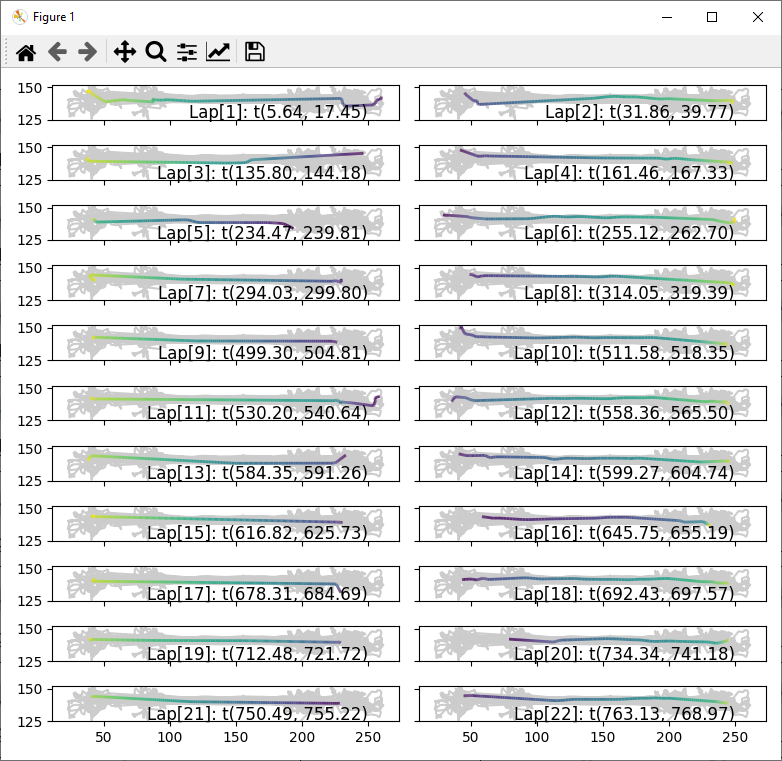 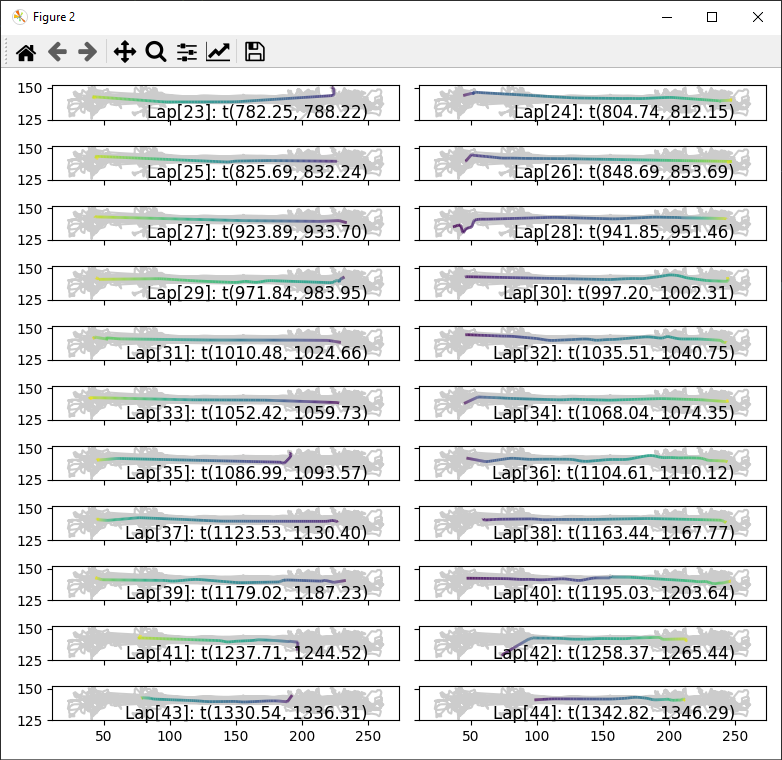

## 📈 Rendered Time Curves Documentation Guide

#### `PyQtGraphSpecificTimeCurvesMixin(TimeCurvesViewMixin)`: mostly overriden for Spike2DRaster, but defines main plotting functions for Spike3DRaster
pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.TimeCurves.RenderTimeCurvesMixin.PyQtGraphSpecificTimeCurvesMixin


In [ ]:
add_3D_time_curves

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.TimeCurves.SpecificTimeCurves import GeneralRenderTimeCurves
from pyphoplacecellanalysis.GUI.Qt.Menus.LocalMenus_AddRenderable.LocalMenus_AddRenderable import LocalMenus_AddRenderable

### For `Spike2DRaster`

##### Requires

self.params.time_curves_no_update

### Single Datasource for time-curves:
self.params.time_curves_datasource



#### Provides
`self.ui.main_time_curves_view_widget`  
`self.ui.main_time_curves_view_legend`  

#### Functions
`clear_all_3D_time_curves(self)`  

`update_3D_time_curves(self)`  

`_build_or_update_time_curves_legend(self)`  

---
##### `_build_or_update_time_curves_plot`: uses or builds a new `self.ui.main_time_curves_view_widget`, which the item is added to
`_build_or_update_time_curves_plot(self, plot_name, points, **kwargs)`  

---
update_3D_time_curves_baseline_grid_mesh
remove_3D_time_curves_baseline_grid_mesh


#### TimeCurvesViewMixin/PyQtGraphSpecificTimeCurvesMixin specific overrides for 2D:
""" 
As soon as the first 2D Time Curve plot is needed, it creates:  

    `self.ui.main_time_curves_view_widget - PlotItem by calling add_separate_render_time_curves_plot_item(...)`  


`main_time_curves_view_widget` creates new `PlotDataItems` by calling `self.ui.main_time_curves_view_widget.plot(...)`  
    This `.plot(...)` command can take either:   
        `.plot(x=x, y=y)`  
        `.plot(ndarray(N,2)): single numpy array with shape (N, 2), where x=data[:,0] and y=data[:,1]`  

"""

### Procedure: Adding new Curves:
1. Copy `pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.TimeCurves.SpecificTimeCurves.PositionRenderTimeCurves` into a new structure, changing as needed to display your desired variables
2. Add your new curve class to the import list at the top of `pyphoplacecellanalysis.GUI.Qt.Menus.LocalMenus_AddRenderable.LocalMenus_AddRenderable` 
3. Use QtDesigner to add your menu in `GUI/Qt/Menus/LocalMenus_AddRenderable/LocalMenus_AddRenderable.ui` with an appropriate name.
	1. The objectName must follow the convention: `actionAddTimeCurves_Position`  -> e.g. `actionAddTimeCurves_Velocity`
4. Save and compile the .ui file (In VSCode: Right click > Compile .ui file)
5. Inside `LocalMenus_AddRenderable.build_renderable_menu(...)` add the appropriate entry to the `submenu_addTimeCurves` and `submenu_addTimeCurvesCallbacks` arrays.
	1. `lambda evt=None: VelocityRenderTimeCurves.add_render_time_curves(curr_sess=sess, destination_plot=destination_plot),`

##### TODO: Time-curve adding improvements
Enable users to 'register' new curves which are then added to the menu and the plot

## Screenshots

![[WithPBE_Epochs.png|500]]

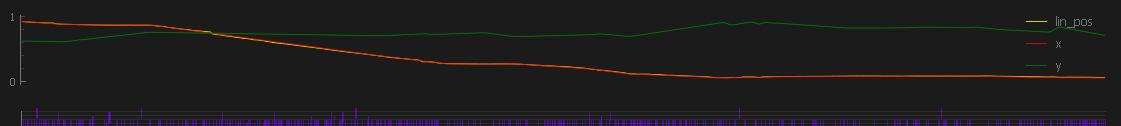

# `matplotlib_view_widget`

### Dynamic Matplotlib Plots in Spike2DRaster

`self.ui.matplotlib_view_widget`

In `Spike2DRaster`
```python
self.ui.dynamic_docked_widget_container = NestedDockAreaWidget()
```
Helper Functions:
```python
# matplotlib render subplot __________________________________________________________________________________________ #
    def add_new_matplotlib_render_plot_widget(self, row=1, col=0, name='matplotlib_view_widget'):
        """ creates a new MatplotlibTimeSynchronizedWidget, a container widget that holds a matplotlib figure, and adds it as a row to the main layout """

    def remove_matplotlib_render_plot_widget(self):
        """ removes the subplot - does not work yet """

    def sync_matplotlib_render_plot_widget(self):
        """ Perform Initial (one-time) update from source -> controlled: """

    def clear_all_matplotlib_plots(self):
        """ required by the menu function """

    curr_widget, curr_fig, curr_ax = active_2d_plot.find_matplotlib_render_plot_widget('Custom Decoder')
        
```

# ◽📣 Rectangle Epoch Documentation Guide


<!-- C:\Users\pho\repos\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\General\Model\Datasources\IntervalDatasource.py -->
<!-- [/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/General/Model/Datasources/IntervalDatasource.py:20](vscode://file/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/General/Model/Datasources/IntervalDatasource.py:20) -->
[IntervalsDatasource](vscode://file/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/General/Model/Datasources/IntervalDatasource.py:20)

<!-- C:\Users\pho\repos\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\GUI\PyQtPlot\Widgets\Mixins\RenderTimeEpochs\EpochRenderingMixin.py -->
[EpochRenderingMixin](vscode://file/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/GUI/PyQtPlot/Widgets/Mixins/RenderTimeEpochs/EpochRenderingMixin.py:42)

<!-- C:\Users\pho\repos\pyPhoPlaceCellAnalysis\src\pyphoplacecellanalysis\GUI\PyQtPlot\Widgets\Mixins\RenderTimeEpochs\RenderTimeEpoch3DMeshesMixin.py -->
[RenderTimeEpoch3DMeshesMixin](vscode://file/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/GUI/PyQtPlot/Widgets/Mixins/RenderTimeEpochs/RenderTimeEpoch3DMeshesMixin.py:20)

#### `Render2DEventRectanglesHelper`:

[GUI/PyQtPlot/Widgets/Mixins/RenderTimeEpochs/Render2DEventRectanglesHelper.py](vscode://file/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/GUI/PyQtPlot/Widgets/Mixins/RenderTimeEpochs/Render2DEventRectanglesHelper.py:30)

#### `Specific2DRenderTimeEpochs`:

[GUI/PyQtPlot/Widgets/Mixins/RenderTimeEpochs/Specific2DRenderTimeEpochs.py](vscode://file/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/GUI/PyQtPlot/Widgets/Mixins/RenderTimeEpochs/Specific2DRenderTimeEpochs.py:24)


#### `Spike2DRaster`
_perform_add_render_item
_perform_remove_render_item
add_laps_intervals/remove_laps_intervals
add_PBEs_intervals/remove_PBEs_intervals



## Screenshots

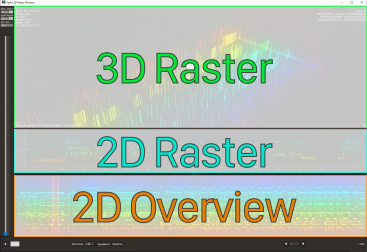

### 3D Interval Rects
#rectangles #IntervalRectsItem #interval #PBEs #3d #spike3d 


Here you can see many short intervals rendered as cyan rectangles on the floor of the 3D Raster

`active_3d_plot.add_rendered_intervals(new_ripples_intervals_datasource, name='new_ripples')`

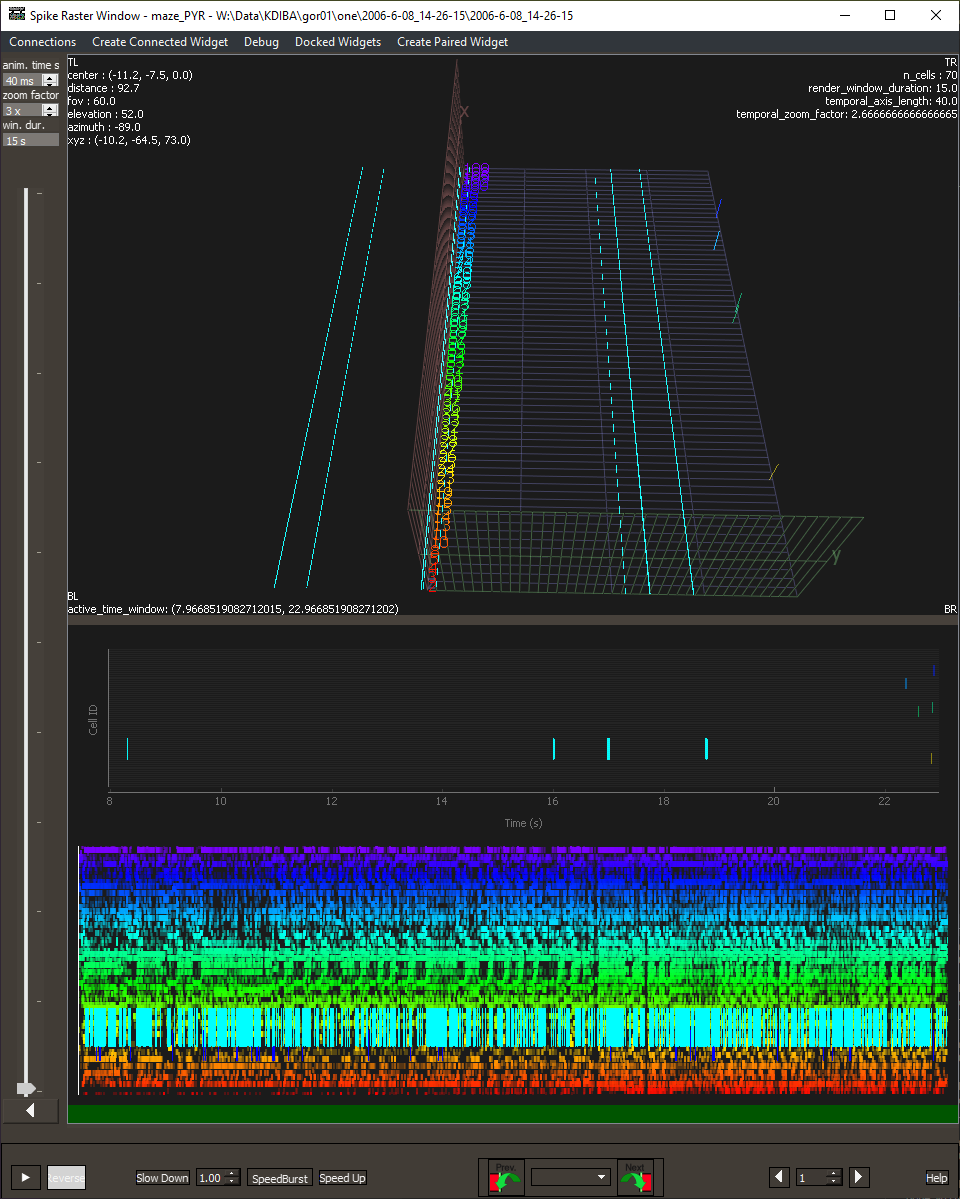
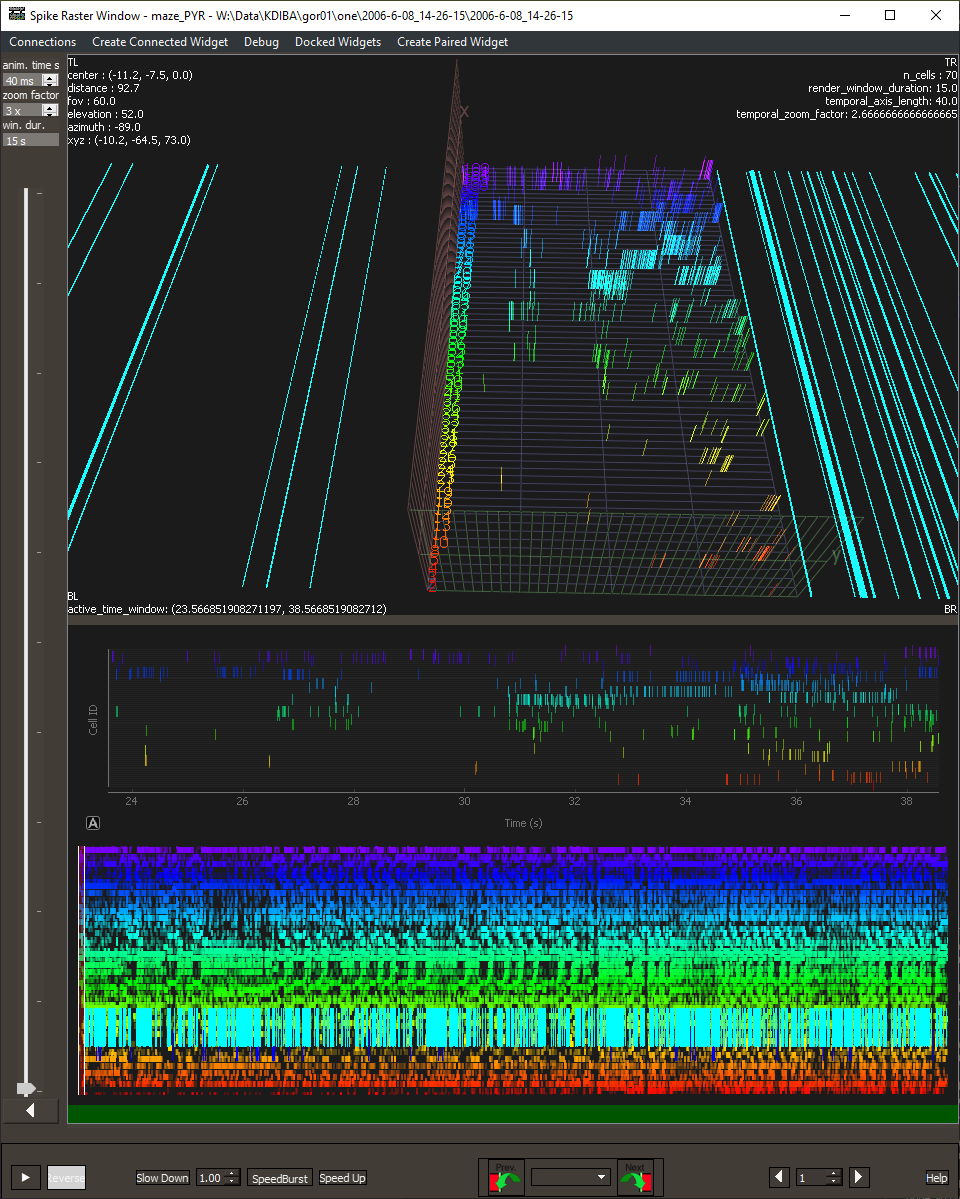

## ◽📣 ✅ Testing 2D Rectangle Epochs on Raster Plot

In [ ]:
laps_interval_datasource = Specific2DRenderTimeEpochsHelper.build_Laps_render_time_epochs_datasource(curr_sess=sess, series_vertical_offset=max_series_top, series_height=1.0) # series_vertical_offset=42.0
new_PBEs_interval_datasource = Specific2DRenderTimeEpochsHelper.build_PBEs_render_time_epochs_datasource(curr_sess=sess, series_vertical_offset=(max_series_top+1.0), series_height=3.0) # new_PBEs_interval_datasource

## General Adding:
active_2d_plot.add_rendered_intervals(new_PBEs_interval_datasource, name='PBEs', child_plots=[background_static_scroll_plot_widget, main_plot_widget], debug_print=False)
active_2d_plot.add_rendered_intervals(laps_interval_datasource, name='Laps', child_plots=[background_static_scroll_plot_widget, main_plot_widget], debug_print=False)

In [ ]:
active_2d_plot.add_laps_intervals(sess)

In [ ]:
active_2d_plot.remove_laps_intervals()

In [ ]:
# active_2d_plot.add_PBEs_intervals(sess)

In [ ]:
active_2d_plot.interval_rendering_plots

In [ ]:
active_2d_plot.clear_all_rendered_intervals()

In [ ]:
interval_info = active_2d_plot.list_all_rendered_intervals()
interval_info

## 📣 Programmatically adding several epoch rectangles by calling the addRenderable context menu functions all at once for SpikeRaster2D

In [ ]:
add_renderables_menu = active_2d_plot.ui.menus.custom_context_menus.add_renderables[0].programmatic_actions_dict
menu_commands = ['AddTimeIntervals.PBEs', 'AddTimeIntervals.Ripples', 'AddTimeIntervals.Replays', 'AddTimeIntervals.Laps', 'AddTimeIntervals.SessionEpochs']
for a_command in menu_commands:
    add_renderables_menu[a_command].trigger()

## ◽📣 Updating Epochs visual appearance

In [ ]:
interval_info = active_2d_plot.list_all_rendered_intervals()
interval_info

In [ ]:
active_2d_plot.clear_all_rendered_intervals()

In [ ]:
active_2d_plot.interval_rendering_plots

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.RenderTimeEpochs.Specific2DRenderTimeEpochs import General2DRenderTimeEpochs, Ripples_2DRenderTimeEpochs

# Need to deal with pg.mkPen(a_pen_color) and pg.mkBrush
def build_custom_epochs_dataframe_formatter(cls, **kwargs):
    def _add_interval_dataframe_visualization_columns_general_epoch(active_df):
        """ Adds the remaining _required_interval_visualization_columns specifically for PBEs
        """
        num_intervals = np.shape(active_df)[0]
        ## parameters:
        y_location = 0.0
        height = 20.5
        pen_color = pg.mkColor('w')
        pen_color.setAlphaF(0.8)

        brush_color = pg.mkColor('grey')
        brush_color.setAlphaF(0.5)

        ## Update the dataframe's visualization columns:
        active_df = cls._update_df_visualization_columns(active_df, y_location=y_location, height=height, pen_color=pen_color, brush_color=brush_color, **kwargs)
        return active_df
    return _add_interval_dataframe_visualization_columns_general_epoch

interval_datasource = Ripples_2DRenderTimeEpochs.build_render_time_epochs_datasource(sess.laps.as_epoch_obj(), epochs_dataframe_formatter=build_custom_epochs_dataframe_formatter) # **({'series_vertical_offset': 42.0, 'series_height': 1.0} | kwargs)
spike_raster_window.spike_raster_plt_2d.add_rendered_intervals(interval_datasource, name='CustomRipples', debug_print=False) # removes the rendered intervals

### Concise Update:

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.RenderTimeEpochs.Specific2DRenderTimeEpochs import General2DRenderTimeEpochs, Ripples_2DRenderTimeEpochs, inline_mkColor
## Inline Concise: Position Replays, PBEs, and Ripples all below the scatter:
# active_2d_plot.interval_datasources.Replays.update_visualization_properties(lambda active_df, **kwargs: General2DRenderTimeEpochs._update_df_visualization_columns(active_df, y_location=-10.0, height=7.5, pen_color=inline_mkColor('orange', 0.8), brush_color=inline_mkColor('orange', 0.5), **kwargs)) ## Fully inline
# active_2d_plot.interval_datasources.PBEs.update_visualization_properties(lambda active_df, **kwargs: General2DRenderTimeEpochs._update_df_visualization_columns(active_df, y_location=-2.0, height=1.5, pen_color=inline_mkColor('pink', 0.8), brush_color=inline_mkColor('pink', 0.5), **kwargs)) ## Fully inline
# active_2d_plot.interval_datasources.Ripples.update_visualization_properties(lambda active_df, **kwargs: General2DRenderTimeEpochs._update_df_visualization_columns(active_df, y_location=-12.0, height=1.5, pen_color=inline_mkColor('cyan', 0.8), brush_color=inline_mkColor('cyan', 0.5), **kwargs)) ## Fully inline
# active_2d_plot.interval_datasources.SessionEpochs .update_visualization_properties(lambda active_df, **kwargs: General2DRenderTimeEpochs._update_df_visualization_columns(active_df, y_location=-12.0, height=1.5, pen_color=inline_mkColor('cyan', 0.8), brush_color=inline_mkColor('cyan', 0.5), **kwargs)) ## Fully inline
epochs_update_dict = {
    'Replays':dict(y_location=-10.0, height=7.5, pen_color=inline_mkColor('orange', 0.8), brush_color=inline_mkColor('orange', 0.5)),
    'PBEs':dict(y_location=-2.0, height=1.5, pen_color=inline_mkColor('pink', 0.8), brush_color=inline_mkColor('pink', 0.5)),
    'Ripples':dict(y_location=-12.0, height=1.5, pen_color=inline_mkColor('cyan', 0.8), brush_color=inline_mkColor('cyan', 0.5)),
    'SessionEpochs ':dict(y_location=-12.0, height=1.5, pen_color=inline_mkColor('cyan', 0.8), brush_color=inline_mkColor('cyan', 0.5)),
}
active_2d_plot.update_rendered_intervals_visualization_properties(epochs_update_dict)


### Build Stacked Layout:

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.RenderTimeEpochs.EpochRenderingMixin import EpochRenderingMixin, RenderedEpochsItemsContainer

rendered_interval_keys = list(interval_info.keys())
desired_interval_height_ratios = [2.0, 2.0, 1.0, 0.1, 1.0, 1.0, 1.0] # ratio of heights to each interval
required_vertical_offsets, required_interval_heights = EpochRenderingMixin.build_stacked_epoch_layout(desired_interval_height_ratios, epoch_render_stack_height=20.0, interval_stack_location='below')
stacked_epoch_layout_dict = {interval_key:dict(y_location=y_location, height=height) for interval_key, y_location, height in zip(rendered_interval_keys, required_vertical_offsets, required_interval_heights)} # Build a stacked_epoch_layout_dict to update the display
active_2d_plot.update_rendered_intervals_visualization_properties(stacked_epoch_layout_dict)

## ◽📣 Building Epochs to render from scratch from a list of pd.DataFrames and custom-defined properties describing their visual appearance

In [ ]:
from pyphocorehelpers.Filesystem.HDF5.hdf5_file_helpers import hdf5_to_pandas_df_dict

debug_output_hdf5_file_path = Path('output', 'laps_train_test_split.h5').resolve()
assert debug_output_hdf5_file_path.exists()
loaded_hdf5_laps_data_dict, failed_keys = hdf5_to_pandas_df_dict(hdf5_path=debug_output_hdf5_file_path)

## Extract the specific results:
decoder_name: str = 'long_LR'
laps_df = loaded_hdf5_laps_data_dict[f'/provided/{decoder_name}/laps_df']
train_df = loaded_hdf5_laps_data_dict[f'/valid/{decoder_name}/train_df']
test_df = loaded_hdf5_laps_data_dict[f'/valid/{decoder_name}/test_df']


from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.RenderTimeEpochs.Specific2DRenderTimeEpochs import General2DRenderTimeEpochs, inline_mkColor
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster import Spike2DRaster
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.RenderTimeEpochs.EpochRenderingMixin import EpochRenderingMixin, RenderedEpochsItemsContainer
from pyphoplacecellanalysis.General.Model.Datasources.IntervalDatasource import IntervalsDatasource
from neuropy.utils.mixins.time_slicing import TimeColumnAliasesProtocol


## Use the three dataframes as separate Epoch series:
train_test_split_laps_dfs_dict = {
    'LapsAll': laps_df,
    'LapsTrain': train_df,
    'LapsTest': test_df,
}

train_test_split_laps_epochs_formatting_dict = {
    'LapsAll':dict(y_location=-10.0, height=7.5, pen_color=inline_mkColor('white', 0.8), brush_color=inline_mkColor('white', 0.5)),
    'LapsTrain':dict(y_location=-2.0, height=1.5, pen_color=inline_mkColor('purple', 0.8), brush_color=inline_mkColor('purple', 0.5)),
    'LapsTest':dict(y_location=-12.0, height=1.5, pen_color=inline_mkColor('green', 0.8), brush_color=inline_mkColor('green', 0.5)),
}

required_vertical_offsets, required_interval_heights = EpochRenderingMixin.build_stacked_epoch_layout([0.2, 1.0, 1.0], epoch_render_stack_height=40.0, interval_stack_location='below') # ratio of heights to each interval
stacked_epoch_layout_dict = {interval_key:dict(y_location=y_location, height=height) for interval_key, y_location, height in zip(list(train_test_split_laps_epochs_formatting_dict.keys()), required_vertical_offsets, required_interval_heights)} # Build a stacked_epoch_layout_dict to update the display
# stacked_epoch_layout_dict # {'LapsAll': {'y_location': -3.6363636363636367, 'height': 3.6363636363636367}, 'LapsTrain': {'y_location': -21.818181818181817, 'height': 18.18181818181818}, 'LapsTest': {'y_location': -40.0, 'height': 18.18181818181818}}

# replaces 'y_location', 'position' for each dict:
train_test_split_laps_epochs_formatting_dict = {k:(v|stacked_epoch_layout_dict[k]) for k, v in train_test_split_laps_epochs_formatting_dict.items()}
train_test_split_laps_epochs_formatting_dict

# OUTPUTS: train_test_split_laps_dfs_dict, train_test_split_laps_epochs_formatting_dict

In [ ]:
## INPUTS: train_test_split_laps_dfs_dict
train_test_split_laps_dfs_dict = {k:TimeColumnAliasesProtocol.renaming_synonym_columns_if_needed(df=v, required_columns_synonym_dict=IntervalsDatasource._time_column_name_synonyms) for k, v in train_test_split_laps_dfs_dict.items()}

## Build interval datasources for them:
train_test_split_laps_dfs_datasources_dict = {k:General2DRenderTimeEpochs.build_render_time_epochs_datasource(v) for k, v in train_test_split_laps_dfs_dict.items()}
## INPUTS: active_2d_plot, train_test_split_laps_epochs_formatting_dict, train_test_split_laps_dfs_datasources_dict
assert len(train_test_split_laps_epochs_formatting_dict) == len(train_test_split_laps_dfs_datasources_dict)
for k, an_interval_ds in train_test_split_laps_dfs_datasources_dict.items():
    an_interval_ds.update_visualization_properties(lambda active_df, **kwargs: General2DRenderTimeEpochs._update_df_visualization_columns(active_df, **(train_test_split_laps_epochs_formatting_dict[k] | kwargs)))

## Full output: train_test_split_laps_dfs_datasources_dict

In [ ]:
# actually add the epochs:
for k, an_interval_ds in train_test_split_laps_dfs_datasources_dict.items():
    active_2d_plot.add_rendered_intervals(an_interval_ds, name=f'{k}', debug_print=False) # adds the interval



In [ ]:
## They can later be updated via:
active_2d_plot.update_rendered_intervals_visualization_properties(train_test_split_laps_epochs_formatting_dict)


In [ ]:
## INPUTS: train_test_split_laps_dfs_dict
train_test_split_laps_dfs_dict = {k:TimeColumnAliasesProtocol.renaming_synonym_columns_if_needed(df=v, required_columns_synonym_dict=IntervalsDatasource._time_column_name_synonyms) for k, v in train_test_split_laps_dfs_dict.items()}

## Build interval datasources for them:
train_test_split_laps_dfs_datasources_dict = {k:General2DRenderTimeEpochs.build_render_time_epochs_datasource(v) for k, v in train_test_split_laps_dfs_dict.items()}
## INPUTS: active_2d_plot, train_test_split_laps_epochs_formatting_dict, train_test_split_laps_dfs_datasources_dict
assert len(train_test_split_laps_epochs_formatting_dict) == len(train_test_split_laps_dfs_datasources_dict)
for k, an_interval_ds in train_test_split_laps_dfs_datasources_dict.items():
    an_interval_ds.update_visualization_properties(lambda active_df, **kwargs: General2DRenderTimeEpochs._update_df_visualization_columns(active_df, **(train_test_split_laps_epochs_formatting_dict[k] | kwargs)))

## Full output: train_test_split_laps_dfs_datasources_dict

In [ ]:
# actually add the epochs:
for k, an_interval_ds in train_test_split_laps_dfs_datasources_dict.items():
    active_2d_plot.add_rendered_intervals(an_interval_ds, name=f'{k}', debug_print=False) # adds the interval



In [ ]:
## They can later be updated via:
active_2d_plot.update_rendered_intervals_visualization_properties(train_test_split_laps_epochs_formatting_dict)


## ◽📣 Get list of existing interval rect datasources:
blah blah

In [ ]:
# Plot items:
active_2d_plot.interval_rendering_plots

In [ ]:
# active_2d_plot.interval_datasources.new_ripples
interval_info = active_2d_plot.list_all_rendered_intervals()
interval_info

In [ ]:
active_2d_plot.interval_datasources # RenderPlotsData
# datasource_to_update

In [ ]:
active_2d_plot.interval_datasources.PBEs # IntervalsDatasource

## ◽📣 Update existing interval rects:
Write a function that takes your existing datasource dataframe and updates its columns.

### Before Update:
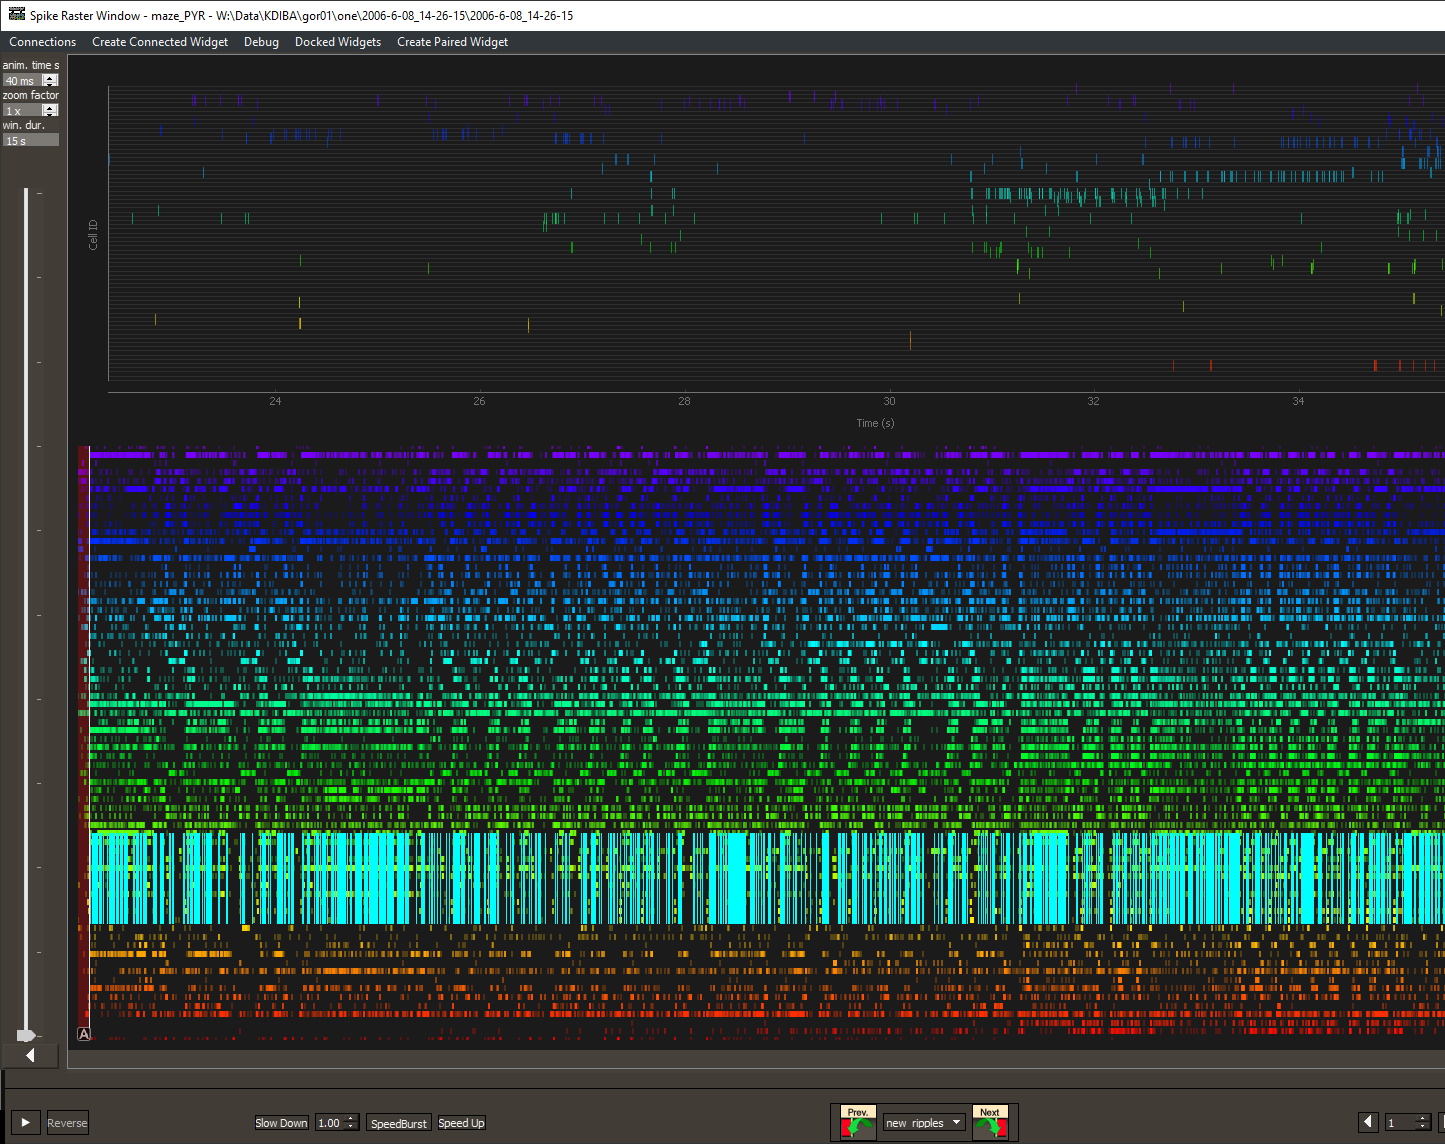

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.RenderTimeEpochs.Specific2DRenderTimeEpochs import General2DRenderTimeEpochs, Ripples_2DRenderTimeEpochs
# series_vertical_offset, series_height, pen, brush

def _updated_custom_interval_dataframe_visualization_columns_general_epoch(active_df, **kwargs):
    """ Adds the remaining _required_interval_visualization_columns specifically for PBEs
    """
    num_intervals = np.shape(active_df)[0]
    ## parameters:
    y_location = 0.0
    height = 30.5
    pen_color = pg.mkColor('grey')
    pen_color.setAlphaF(0.8)

    brush_color = pg.mkColor('grey')
    brush_color.setAlphaF(0.5)

    ## Update the dataframe's visualization columns:
    active_df = General2DRenderTimeEpochs._update_df_visualization_columns(active_df, y_location=y_location, height=height, pen_color=pen_color, brush_color=brush_color, **kwargs)
    return active_df

# get the existing dataframe to be updated:
# datasource_to_update = active_2d_plot.interval_datasources.Ripples
datasource_to_update = active_2d_plot.interval_datasources.new_ripples
# datasource_to_update = active_2d_plot.interval_datasources.CustomRipples
datasource_to_update.update_visualization_properties(_updated_custom_interval_dataframe_visualization_columns_general_epoch)

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.RenderTimeEpochs.Specific2DRenderTimeEpochs import General2DRenderTimeEpochs, inline_mkColor
## Inline Concise: Position Replays, PBEs, and Ripples all below the scatter:
active_2d_plot.interval_datasources.Replays.update_visualization_properties(lambda active_df, **kwargs: General2DRenderTimeEpochs._update_df_visualization_columns(active_df, y_location=-10.0, height=7.5, pen_color=inline_mkColor('orange', 0.8), brush_color=inline_mkColor('orange', 0.5), **kwargs)) ## Fully inline
active_2d_plot.interval_datasources.PBEs.update_visualization_properties(lambda active_df, **kwargs: General2DRenderTimeEpochs._update_df_visualization_columns(active_df, y_location=-2.0, height=1.5, pen_color=inline_mkColor('pink', 0.8), brush_color=inline_mkColor('pink', 0.5), **kwargs)) ## Fully inline
active_2d_plot.interval_datasources.Ripples.update_visualization_properties(lambda active_df, **kwargs: General2DRenderTimeEpochs._update_df_visualization_columns(active_df, y_location=-12.0, height=1.5, pen_color=inline_mkColor('cyan', 0.8), brush_color=inline_mkColor('cyan', 0.5), **kwargs)) ## Fully inline

### Post Update:
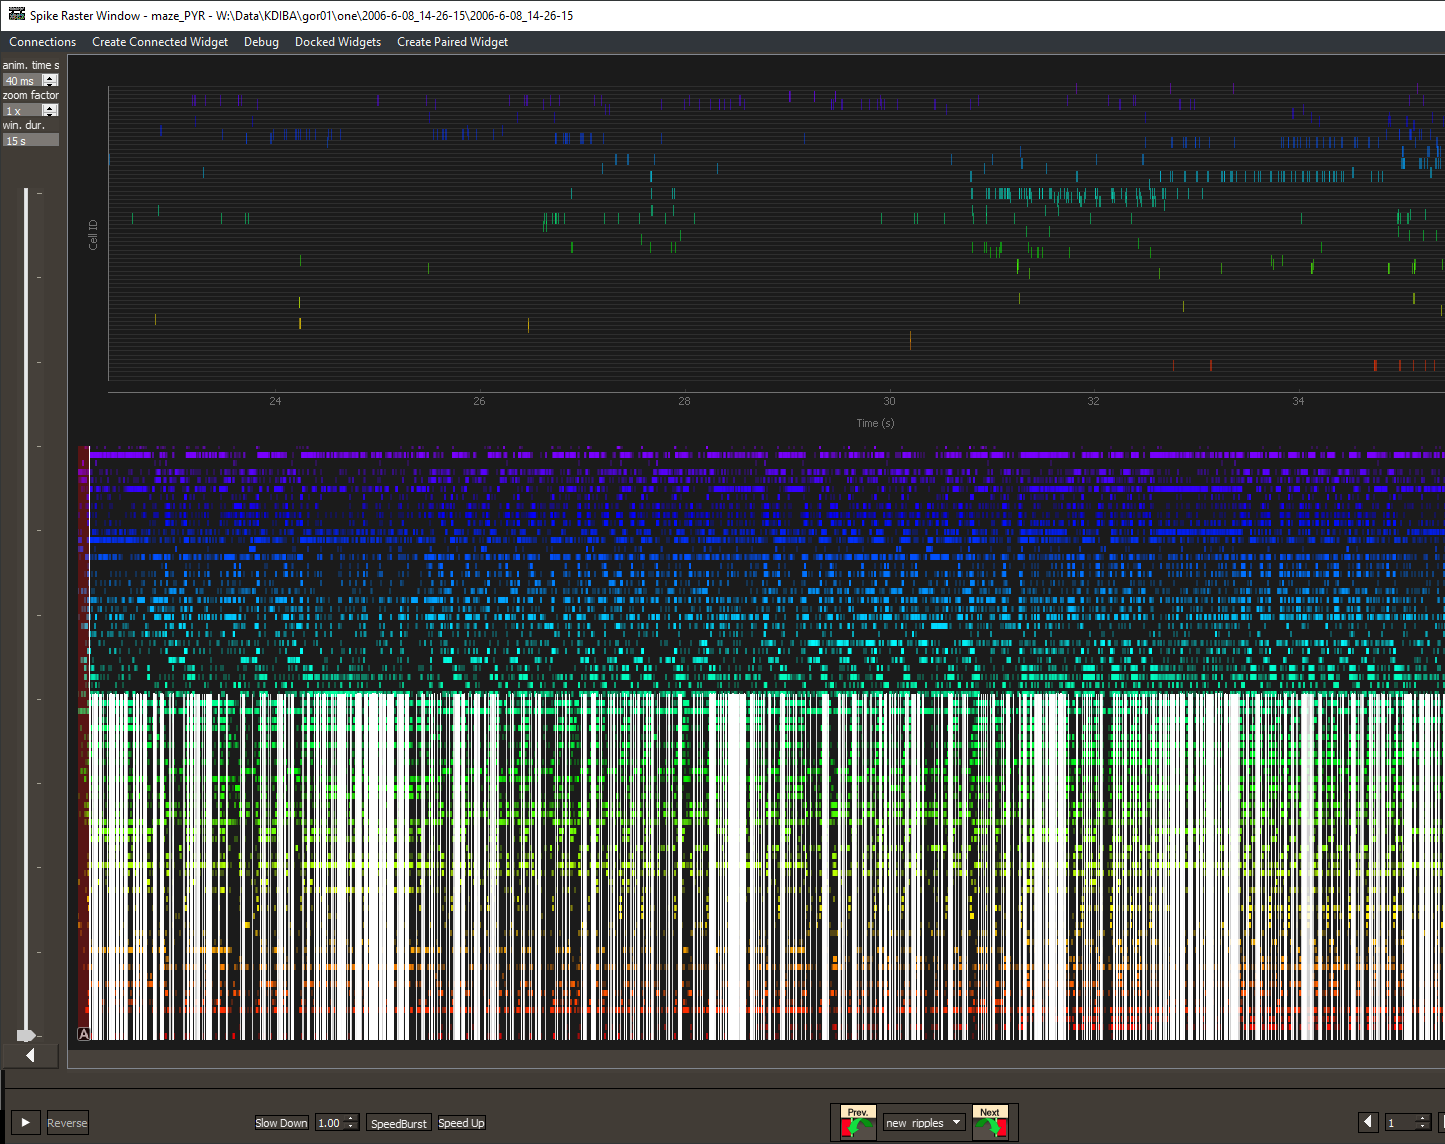

In [ ]:
datasource_to_update.custom_datasource_name

In [ ]:
datasource_to_update.df

In [ ]:
spike_raster_window.spike_raster_plt_2d.add_rendered_intervals(datasource_to_update, name='CustomRipples', debug_print=True) 

In [ ]:
# ## Global main plot (doesn't work)
# fig_global, main_ax = plt.subplots()
# # fig_global, (main_ax) = plt.subplots(1, 1)

# Plot a line in the first axes.
main_ax.plot(ripple_predictions_df.t.to_numpy(), ripple_predictions_df.v.to_numpy(), "-o")
main_ax.set_title(f'global predicted ripple probability: shank {shank_id}')

# # Create a view! Turn axes 2 into a view of axes 1.
# view(ax2, ax1)

# # Modify the second axes data limits so we get a slightly zoomed out view
# ax2.set_xlim(-5, 15)
# ax2.set_ylim(-5, 15)

# fig_global.show()

In [ ]:
plots.fig.show()

In [ ]:
# laps_position_times_list = [np.squeeze(lap_pos_df[['t']].to_numpy()) for lap_pos_df in lap_specific_position_dfs]
# laps_position_traces_list = [lap_pos_df[['x','y']].to_numpy().T for lap_pos_df in lap_specific_position_dfs]

# epochs = sess.laps.to_dataframe()
# epoch_slices = epochs[['start', 'stop']].to_numpy()
# epoch_description_list = [f'lap {epoch_tuple.lap_id} (maze: {epoch_tuple.maze_id}, direction: {epoch_tuple.lap_dir})' for epoch_tuple in epochs[['lap_id','maze_id','lap_dir']].itertuples()]
# print(f'epoch_description_list: {epoch_description_list}')


from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import stacked_epoch_slices_view

stacked_epoch_slices_view_laps_containers = stacked_epoch_slices_view(epoch_slices, laps_position_times_list, laps_position_traces_list, name=f'stacked_epoch_slices_view_new_ripples: shank {shank_id}')
params, plots_data, plots, ui = stacked_epoch_slices_view_laps_containers

In [ ]:
doubleSpinBox_ActiveWindowStartTime
doubleSpinBox_ActiveWindowEndTime

In [ ]:
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\output\old_global_computation_results.pkl
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\loadedSessPickle_2023-10-06.pkl
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\loadedSessPickle_2023-10-05.pkl
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\loadedSessPickle.pkl
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\output\global_computation_results_2023-10-06.pkl
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\output\global_computation_results_2023-10-05.pkl
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\output\global_computation_results.pkl
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\backup-20231113092010-loadedSessPickle.pkl.bak
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\backup-20231110234635-loadedSessPickle.pkl.bak
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\20231113095949-loadedSessPickle.pkl


## ◽📣 Removing/Clearing existing interval rects:

### Selectively Removing:

In [ ]:
active_2d_plot.remove_rendered_intervals(name='PBEs', child_plots_removal_list=[main_plot_widget]) # Tests removing a single series from a single plot (main_plot_widget)
active_2d_plot.remove_rendered_intervals(name='PBEs') # Tests removing a single series ('PBEs') from all plots it's on

# 3D (PyVista/Vedo/etc)-based plots:

In [ ]:
curr_active_pipeline.display('_display_3d_interactive_spike_and_behavior_browser', active_config_name) # this works now!

In [ ]:
display_dict = curr_active_pipeline.display('_display_3d_interactive_custom_data_explorer', active_config_name) # does not work, missing color info?
iplapsDataExplorer = display_dict['iplapsDataExplorer']
# plotter is available at
p = display_dict['plotter']
iplapsDataExplorer

In [ ]:
# curr_kdiba_pipeline.display(DefaultDisplayFunctions._display_3d_interactive_custom_data_explorer, 'maze1') # works!
curr_active_pipeline.display('_display_3d_interactive_tuning_curves_plotter', 'maze1_PYR') # works!

### Adjusting Spike Emphasis:
#### Usage Examples:
```python
from pyphoplacecellanalysis.General.Mixins.SpikesRenderingBaseMixin import SpikeEmphasisState

## Example 1: De-emphasize spikes excluded from the placefield calculations:
is_spike_included_in_pf = np.isin(spike_raster_window.spike_raster_plt_2d.spikes_df.index, active_pf_2D.filtered_spikes_df.index)
spike_raster_window.spike_raster_plt_2d.update_spike_emphasis(np.logical_not(is_spike_included_in_pf), SpikeEmphasisState.Deemphasized)

## Example 2: De-emphasize spikes that don't have their 'aclu' from a given set of indicies:
is_spike_included = spike_raster_window.spike_raster_plt_2d.spikes_df.aclu.to_numpy() == 2
spike_raster_window.spike_raster_plt_2d.update_spike_emphasis(np.logical_not(is_spike_included), SpikeEmphasisState.Deemphasized)

## Example 3: De-emphasize all spikes 
active_2d_plot.update_spike_emphasis(new_emphasis_state=SpikeEmphasisState.Deemphasized)

## Example 4: Hide all spikes entirely
active_2d_plot.update_spike_emphasis(new_emphasis_state=SpikeEmphasisState.Hidden)
```

#### Notes
Looks like there is very advanced emphasis functionality that I haven't explored. See Code example below:
```python

# SpikeEmphasisState
state_alpha = {SpikeEmphasisState.Hidden: 0.01,
			   SpikeEmphasisState.Deemphasized: 0.1,
			   SpikeEmphasisState.Default: 0.5,
			   SpikeEmphasisState.Emphasized: 1.0,
}

# state_color_adjust_fcns: functions that take the base color and call build_adjusted_color to get the adjusted color for each state
state_color_adjust_fcns = {SpikeEmphasisState.Hidden: lambda x: build_adjusted_color(x),
			   SpikeEmphasisState.Deemphasized: lambda x: build_adjusted_color(x, saturation_scale=0.35, value_scale=0.8),
			   SpikeEmphasisState.Default: lambda x: build_adjusted_color(x),
			   SpikeEmphasisState.Emphasized: lambda x: build_adjusted_color(x, value_scale=1.25),
}

```

### Assigning Cell Colors

2023-10-18 - Use `build_cell_colors` to build configs


In [ ]:

@function_attributes(short_name=None, tags=['colors', 'neuron_identity'], input_requires=[], output_provides=[], uses=[], used_by=[], creation_date='2023-10-18 11:33', related_items=[])
def build_cell_colors(n_neurons:int, colormap_name='hsv', colormap_source='matplotlib'):
	"""Cell Colors from just n_neurons using pyqtgraph colormaps.
	
	"""
	cm = pg.colormap.get(colormap_name, source=colormap_source) # prepare a linear color map

	# unit_colors_list = None # default rainbow of colors for the raster plots
	neuron_qcolors_list = cm.mapToQColor(np.arange(n_neurons)/float(n_neurons-1)) # returns a list of QColors
	neuron_colors_ndarray = DataSeriesColorHelpers.qColorsList_to_NDarray(neuron_qcolors_list, is_255_array=True)
	# neuron_colors_ndarray = DataSeriesColorHelpers.qColorsList_to_NDarray(neuron_qcolors_list, is_255_array=False)
	return neuron_qcolors_list, neuron_colors_ndarray


included_unit_neuron_IDs = active_2d_plot.neuron_ids
# n_neurons = len(EITHER_subset.track_exclusive_aclus)
n_neurons = len(included_unit_neuron_IDs)
# neuron_qcolors_list, neuron_colors_ndarray = build_cell_colors(n_neurons)
# neuron_qcolors_list, neuron_colors_ndarray = build_cell_colors(n_neurons, colormap_name='gist_rainbow')
neuron_qcolors_list, neuron_colors_ndarray = build_cell_colors(n_neurons, colormap_name='PAL-relaxed_bright', colormap_source=None)


## Adding new Custom Menu Commands:
#menu #SpikeRaster2D

In [ ]:
from pyphoplacecellanalysis.GUI.Qt.Menus.BaseMenuProviderMixin import BaseMenuCommand

@define(slots=False)
class AddNewDirectionalDecodedEpochs_MatplotlibPlotCommand(BaseMenuCommand):
	""" 2024-01-17 
	Adds four rows to the SpikeRaster2D showing the continuously decoded posterior for each of the four 1D decoders

	Usage:
	from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import AddNewDirectionalDecodedEpochs_MatplotlibPlotCommand

	"""
	_spike_raster_window = field()
	_active_pipeline = field(alias='curr_active_pipeline')
	_active_config_name = field(default=None)
	_context = field(default=None, alias="active_context")
	_display_output = field(default=Factory(dict))

	@classmethod
	def _perform_add_new_decoded_row(cls, curr_active_pipeline, active_2d_plot, a_dock_config, a_decoder_name: str, a_decoder, a_decoded_result=None):
		""" adds a single decoded row to the matplotlib dynamic output
		
		# a_decoder_name: str = "long_LR"

		"""
		from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import plot_1D_most_likely_position_comparsions
		
		## ✅ Add a new row for each of the four 1D directional decoders:
		identifier_name: str = f'{a_decoder_name}_ContinuousDecode'
		print(f'identifier_name: {identifier_name}')
		widget, matplotlib_fig, matplotlib_fig_axes = active_2d_plot.add_new_matplotlib_render_plot_widget(name=identifier_name, dockSize=(65, 200), display_config=a_dock_config)
		an_ax = matplotlib_fig_axes[0]

		# _active_config_name = None
		variable_name: str = a_decoder_name
		active_decoder = deepcopy(a_decoder)
		
		if a_decoded_result is not None:
			active_result = deepcopy(a_decoded_result) # already decoded
			assert (active_result.num_filter_epochs == 1), f"currently only supports decoded results (DecodedFilterEpochsResult) computed with a single epoch for all time bins, but active_result.num_filter_epochs: {active_result.num_filter_epochs}"
			active_marginals = active_result.marginal_x_list[0]
		else:
			# no previously decoded result, fallback to the decoder's internal properties        
			active_marginals = active_decoder.marginal.x
			

		active_bins = active_decoder.xbin

		# active_most_likely_positions = active_marginals.most_likely_positions_1D # Raw decoded positions
		active_most_likely_positions = None
		active_posterior = active_marginals.p_x_given_n

		# most_likely_positions_mode: 'standard'|'corrected'
		# fig, curr_ax = curr_active_pipeline.display('_display_plot_marginal_1D_most_likely_position_comparisons', _active_config_name, variable_name='x', most_likely_positions_mode='corrected', ax=an_ax) # ax=active_2d_plot.ui.matplotlib_view_widget.ax
		## Actual plotting portion:
		fig, curr_ax = plot_1D_most_likely_position_comparsions(None, time_window_centers=active_decoder.time_window_centers, xbin=active_bins,
																posterior=active_posterior,
																active_most_likely_positions_1D=active_most_likely_positions,
																ax=an_ax, variable_name=variable_name, debug_print=True, enable_flat_line_drawing=False)

		widget.draw() # alternative to accessing through full path?
		active_2d_plot.sync_matplotlib_render_plot_widget(identifier_name) # Sync it with the active window:
		return identifier_name, widget, matplotlib_fig, matplotlib_fig_axes

	@classmethod
	def add_directional_decoder_decoded_epochs(cls, curr_active_pipeline, active_2d_plot, debug_print=False):
		""" adds the decoded epochs for the long/short decoder from the global_computation_results as new matplotlib plot rows. """
		from pyphoplacecellanalysis.General.Model.Configs.LongShortDisplayConfig import DisplayColorsEnum
		from pyphoplacecellanalysis.GUI.PyQtPlot.DockingWidgets.DynamicDockDisplayAreaContent import CustomDockDisplayConfig
		from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.RankOrderComputations import RankOrderAnalyses
		
		showCloseButton = True
		dock_configs = dict(zip(('long_LR', 'long_RL', 'short_LR', 'short_RL'), (CustomDockDisplayConfig(custom_get_colors_callback_fn=DisplayColorsEnum.Laps.get_LR_dock_colors, showCloseButton=showCloseButton), CustomDockDisplayConfig(custom_get_colors_callback_fn=DisplayColorsEnum.Laps.get_RL_dock_colors, showCloseButton=showCloseButton),
						CustomDockDisplayConfig(custom_get_colors_callback_fn=DisplayColorsEnum.Laps.get_LR_dock_colors, showCloseButton=showCloseButton), CustomDockDisplayConfig(custom_get_colors_callback_fn=DisplayColorsEnum.Laps.get_RL_dock_colors, showCloseButton=showCloseButton))))


		## Uses the `global_computation_results.computed_data['DirectionalDecodersDecoded']`
		directional_decoders_decode_result: DirectionalDecodersDecodedResult = curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded']
		all_directional_pf1D_Decoder_dict: Dict[str, BasePositionDecoder] = directional_decoders_decode_result.pf1D_Decoder_dict
		# continuously_decoded_result_cache_dict = directional_decoders_decode_result.continuously_decoded_result_cache_dict
		time_bin_size: float = directional_decoders_decode_result.most_recent_decoding_time_bin_size
		print(f'time_bin_size: {time_bin_size}')
		continuously_decoded_dict: Dict[str, DecodedFilterEpochsResult] = directional_decoders_decode_result.most_recent_continuously_decoded_dict
		all_directional_continuously_decoded_dict = continuously_decoded_dict or {}

		# Need all_directional_pf1D_Decoder_dict
		output_dict = {}

		for a_decoder_name, a_decoder in all_directional_pf1D_Decoder_dict.items():
			a_dock_config = dock_configs[a_decoder_name]
			a_decoded_result = all_directional_continuously_decoded_dict.get(a_decoder_name, None) # already decoded
			_out_tuple = cls._perform_add_new_decoded_row(curr_active_pipeline=curr_active_pipeline, active_2d_plot=active_2d_plot, a_dock_config=a_dock_config, a_decoder_name=a_decoder_name, a_decoder=a_decoder, a_decoded_result=a_decoded_result)
			# identifier_name, widget, matplotlib_fig, matplotlib_fig_axes = _out_tuple
			output_dict[a_decoder_name] = _out_tuple

		return output_dict


	def validate_can_display(self) -> bool:
		""" returns True if the item is enabled, otherwise returns false """
		try:
			curr_active_pipeline = self._active_pipeline
			# assert curr_active_pipeline is not None
			if curr_active_pipeline is None:
				raise ValueError("Current active pipeline is None!")
			active_2d_plot = self._spike_raster_window.spike_raster_plt_2d
			# assert active_2d_plot is not None
			if active_2d_plot is None:
				raise ValueError("active_2d_plot is None!")

			return DirectionalDecodersDecodedResult.validate_has_directional_decoded_continuous_epochs(curr_active_pipeline=curr_active_pipeline)
			
		except Exception as e:
			print(f'Exception {e} occured in validate_can_display(), returning False')
			return False

	def execute(self, *args, **kwargs) -> None:
		## To begin, the destination plot must have a matplotlib widget plot to render to:
		# print(f'AddNewDirectionalDecodedEpochs_MatplotlibPlotCommand.execute(...)')
		active_2d_plot = self._spike_raster_window.spike_raster_plt_2d
		# If no plot to render on, do this:
		output_dict = self.add_directional_decoder_decoded_epochs(self._active_pipeline, active_2d_plot) # ['long_LR', 'long_RL', 'short_LR', 'short_RL']
		# Update display output dict:
		for a_decoder_name, an_output_tuple in output_dict.items():
			identifier_name, widget, matplotlib_fig, matplotlib_fig_axes = an_output_tuple
			self._display_output[identifier_name] = an_output_tuple

		print(f'\t AddNewDirectionalDecodedEpochs_MatplotlibPlotCommand.execute() is done.')



# 🏻‍💻 DEVELOPER SECTION

## TODO/PENDING

#### Set the tooltip for each individual rect so that when you hover a rect it shows relevant information (that intervals series name, its (start, end) times, duration, index, etc
search code in cell below to find where it's set generally. Try `CustomIntervalRectsItem`
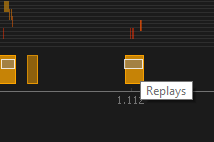

In [ ]:
# Build the rendered interval item:
new_interval_rects_item = Render2DEventRectanglesHelper.build_IntervalRectsItem_from_interval_datasource(interval_datasource)
new_interval_rects_item.setToolTip(name) # The tooltip is set generically here to 'PBEs', 'Replays' or whatever the dataseries name is

## 2023-04-13 - Desired Plotting Interface Idea:


```python
# Rows of plots can be constructed trivially through lists:
row_of_plots = [pg.plot(curr_cell_pf_curve, label='curr_cell_pf_curve'), pg.plot(curr_random_not_firing_cell_pf_curve, label='curr_random_not_firing_cell_pf_curve'), ...] 
	# I'd guess behind the scenes they would be converted into a helper.row([...]) object

# If you want a column instead, use helper.column
column_of_plots = helper.column([pg.plot(curr_cell_pf_curve, label='curr_cell_pf_curve'), pg.plot(curr_random_not_firing_cell_pf_curve, label='curr_random_not_firing_cell_pf_curve'), ...])

# The returned objects are composable:
row_of_layouts = [row_of_plots, column_of_plots] # stacks the layout objects just like they were plot objects

# Showing the result is easy, as is combining separate results in a new place:
whole_figure_window = [row_of_layouts] 
whole_figure_window.show()
```

""" 
Relevant Functions:
`perform_full_session_leave_one_out_decoding_analysis`:
	`perform_leave_one_aclu_out_decoding_analysis`:	from pyphoplacecellanalysis.Analysis.Decoder.decoder_result import perform_leave_one_aclu_out_decoding_analysis
	`_analyze_leave_one_out_decoding_results`: from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.DefaultComputationFunctions import _analyze_leave_one_out_decoding_results
"""



## Custom Container Classes for UI
### VisualizationParameters, RenderPlotsData, RenderPlots, PhoUIContainer

from pyphocorehelpers.DataStructure.general_parameter_containers import VisualizationParameters, RenderPlotsData, RenderPlots
PyqtgraphRenderPlots, MatplotlibRenderPlots
from pyphocorehelpers.gui.PhoUIContainer import PhoUIContainer

In [ ]:

from pyphocorehelpers.DataStructure.general_parameter_containers import VisualizationParameters, RenderPlotsData, RenderPlots
from pyphocorehelpers.gui.PhoUIContainer import PhoUIContainer

# For scrollable BasicBinnedImageRenderingWindow
from pyphoplacecellanalysis.Pho2D.PyQtPlots.Extensions.pyqtgraph_helpers import LayoutScrollability, _perform_build_root_graphics_layout_widget_ui, build_scrollable_graphics_layout_widget_ui, build_scrollable_graphics_layout_widget_with_nested_viewbox_ui


class BasicBinnedImageRenderingWindow(QtWidgets.QMainWindow):
    """ Renders a Matrix of binned data in the window.NonUniformImage and includes no histogram.
        NOTE: uses basic pg.ImageItem instead of pg.
        Observed to work well to display simple binned heatmaps/grids such as avg velocity across spatial bins, etc.    
        
        History:
            Based off of pyphoplacecellanalysis.GUI.PyQtPlot.pyqtplot_Matrix.MatrixRenderingWindow
            
        Usage:
            from pyphoplacecellanalysis.GUI.PyQtPlot.BinnedImageRenderingWindow import BasicBinnedImageRenderingWindow, LayoutScrollability
            out = BasicBinnedImageRenderingWindow(active_eloy_analysis.avg_2D_speed_per_pos, active_pf_2D_dt.xbin_labels, active_pf_2D_dt.ybin_labels, name='avg_velocity', title="Avg Velocity per Pos (X, Y)", variable_label='Avg Velocity', scrollability_mode=LayoutScrollability.SCROLLABLE)
            out.add_data(row=1, col=0, matrix=active_eloy_analysis.pf_overlapDensity_2D, xbins=active_pf_2D_dt.xbin_labels, ybins=active_pf_2D_dt.ybin_labels, name='pf_overlapDensity', title='pf overlapDensity metric', variable_label='pf overlapDensity')
            out.add_data(row=2, col=0, matrix=active_pf_2D.ratemap.occupancy, xbins=active_pf_2D.xbin, ybins=active_pf_2D.ybin, name='occupancy_seconds', title='Seconds Occupancy', variable_label='seconds')
            out.add_data(row=3, col=0, matrix=active_simpler_pf_densities_analysis.n_neurons_meeting_firing_critiera_by_position_bins_2D, xbins=active_pf_2D.xbin, ybins=active_pf_2D.ybin, name='n_neurons_meeting_firing_critiera_by_position_bins_2D', title='# neurons > 1Hz per Pos (X, Y)', variable_label='# neurons')

    """
    
    def __init__(self, matrix=None, xbins=None, ybins=None, name='avg_velocity', title="Avg Velocity per Pos (X, Y)", variable_label='Avg Velocity',
                 drop_below_threshold: float=0.0000001, color_map='viridis', color_bar_mode=None, wants_crosshairs=True, scrollability_mode=LayoutScrollability.SCROLLABLE, defer_show=False, **kwargs):
        super(BasicBinnedImageRenderingWindow, self).__init__(**kwargs)
        self.params = VisualizationParameters(name='BasicBinnedImageRenderingWindow')
        self.plots_data = RenderPlotsData(name='BasicBinnedImageRenderingWindow')
        self.plots = RenderPlots(name='BasicBinnedImageRenderingWindow')
        self.ui = PhoUIContainer(name='BasicBinnedImageRenderingWindow')
        self.ui.connections = PhoUIContainer(name='BasicBinnedImageRenderingWindow')

        self.params.scrollability_mode = LayoutScrollability.init(scrollability_mode)

        
        if isinstance(color_map, str):        
            self.params.colorMap = pg.colormap.get("viridis")
        else:
            # better be a ColorMap object directly
            assert isinstance(color_map, ColorMap)
            self.params.colorMap = color_map
            
        self.params.color_bar_mode = color_bar_mode
        if self.params.color_bar_mode == 'one':
            # Single shared color_bar between all items:
            self.params.shared_colorBarItem = pg.ColorBarItem(values=(0,1), colorMap=self.params.colorMap, label='all_pf_2Ds')
        else:
            self.params.shared_colorBarItem = None
            
        self.params.wants_crosshairs = wants_crosshairs

        pg.setConfigOption('imageAxisOrder', 'row-major') # Switch default order to Row-major

        ## Old (non-scrollable) way:        
        # self.ui.graphics_layout = pg.GraphicsLayoutWidget(show=True)
        # self.setCentralWidget(self.ui.graphics_layout)

        ## Build scrollable UI version:
        self.ui = _perform_build_root_graphics_layout_widget_ui(self.ui, is_scrollable=self.params.scrollability_mode.is_scrollable)
        if self.params.scrollability_mode.is_scrollable:
            self.setCentralWidget(self.ui.scrollAreaWidget)
        else:
            self.setCentralWidget(self.ui.graphics_layout)

        # Shared:
        self.setWindowTitle(title)
        self.resize(1000, 800)
        
        ## Add Label for debugging:
        self.ui.mainLabel = pg.LabelItem(justify='right')
        self.ui.graphics_layout.addItem(self.ui.mainLabel)
        
        # Add the item for the provided data:
        self.add_data(row=0, col=0, matrix=matrix, xbins=xbins, ybins=ybins, name=name, title=title, variable_label=variable_label, drop_below_threshold=drop_below_threshold)
        
        if not defer_show:
            self.show()

In [ ]:
## Saving



In [ ]:
def save_figure(self, export_path: Path):
	""" Exports all four rasters to a specified file path
	
	_out_rank_order_event_raster_debugger.save_figure(export_path=export_path)
	
	"""
	save_paths = []
	# root_plots_dict = {k:v['root_plot'] for k,v in _out_rank_order_event_raster_debugger.plots.all_separate_plots.items()} # PlotItem 

	root_plots_dict = self.root_plots_dict
	root_plots_dict['long_LR'].setYRange(-0.5, float(self.max_n_neurons))

	for a_decoder, a_plot in root_plots_dict.items():
		a_plot.setYRange(-0.5, float(self.max_n_neurons))
		self.get_epoch_active_aclus()
		out_path = export_path.joinpath(f'{a_decoder}_plot.png').resolve()
		export_pyqtgraph_plot(a_plot, savepath=out_path, background=pg.mkColor(0, 0, 0, 0))
		save_paths.append(out_path)

	return save_paths



## Combine separate figures in pyqtgraph
Exactly what we need to combine the separate figures except this uses pyqtgraph instead of matplotlib



[/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/GUI/PyQtPlot/Widgets/ContainerBased/RankOrderRastersDebugger.py:261](vscode://file/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/GUI/PyQtPlot/Widgets/ContainerBased/RankOrderRastersDebugger.py:261)
```python
# From `GUI.PyQtPlot.Widgets.ContainerBased.RankOrderRastersDebugger.init_rank_order_debugger`
    #TODO 2023-11-30 15:14: - [ ] Unpacking and putting in docks and such not yet finished. Update functions would need to be done separately.
    rasters_display_outputs = _obj.plots.rasters_display_outputs
    all_apps = {a_decoder_name:a_raster_setup_tuple.app for a_decoder_name, a_raster_setup_tuple in rasters_display_outputs.items()}
    all_windows = {a_decoder_name:a_raster_setup_tuple.win for a_decoder_name, a_raster_setup_tuple in rasters_display_outputs.items()}
    all_separate_plots = {a_decoder_name:a_raster_setup_tuple.plots for a_decoder_name, a_raster_setup_tuple in rasters_display_outputs.items()}
    all_separate_plots_data = {a_decoder_name:a_raster_setup_tuple.plots_data for a_decoder_name, a_raster_setup_tuple in rasters_display_outputs.items()}

    main_plot_identifiers_list = list(all_windows.keys()) # ['long_LR', 'long_RL', 'short_LR', 'short_RL']

    ## Extract the data items:
    all_separate_data_all_spots = {a_decoder_name:a_raster_setup_tuple.plots_data.all_spots for a_decoder_name, a_raster_setup_tuple in rasters_display_outputs.items()}
    all_separate_data_all_scatterplot_tooltips_kwargs = {a_decoder_name:a_raster_setup_tuple.plots_data.all_scatterplot_tooltips_kwargs for a_decoder_name, a_raster_setup_tuple in rasters_display_outputs.items()}
    all_separate_data_new_sorted_rasters = {a_decoder_name:a_raster_setup_tuple.plots_data.new_sorted_raster for a_decoder_name, a_raster_setup_tuple in rasters_display_outputs.items()}
    all_separate_data_spikes_dfs = {a_decoder_name:a_raster_setup_tuple.plots_data.spikes_df for a_decoder_name, a_raster_setup_tuple in rasters_display_outputs.items()}

    # Extract the plot/renderable items
    all_separate_root_plots = {a_decoder_name:a_raster_setup_tuple.plots.root_plot for a_decoder_name, a_raster_setup_tuple in rasters_display_outputs.items()}
    all_separate_grids = {a_decoder_name:a_raster_setup_tuple.plots.grid for a_decoder_name, a_raster_setup_tuple in rasters_display_outputs.items()}
    all_separate_scatter_plots = {a_decoder_name:a_raster_setup_tuple.plots.scatter_plot for a_decoder_name, a_raster_setup_tuple in rasters_display_outputs.items()}
    all_separate_debug_header_labels = {a_decoder_name:a_raster_setup_tuple.plots.debug_header_label for a_decoder_name, a_raster_setup_tuple in rasters_display_outputs.items()}

    # Embedding in docks:
    root_dockAreaWindow, app = DockAreaWrapper.build_default_dockAreaWindow(title='Pho Debug Plot Directional Template Rasters')
    icon = try_get_icon(icon_path=":/Icons/Icons/visualizations/template_1D_debugger.ico")
    if icon is not None:
        root_dockAreaWindow.setWindowIcon(icon)

    ## Build Dock Widgets:
    def get_utility_dock_colors(orientation, is_dim):
        """ used for CustomDockDisplayConfig for non-specialized utility docks """
        # Common to all:
        if is_dim:
            fg_color = '#aaa' # Grey
        else:
            fg_color = '#fff' # White

        # a purplish-royal-blue
        if is_dim:
            bg_color = '#d8d8d8'
            border_color = '#717171'
        else:
            bg_color = '#9d9d9d'
            border_color = '#3a3a3a'

        return fg_color, bg_color, border_color


    # decoder_names_list = ('long_LR', 'long_RL', 'short_LR', 'short_RL')
    _out_dock_widgets = {}
    dock_configs = dict(zip(('long_LR', 'long_RL', 'short_LR', 'short_RL'), (CustomDockDisplayConfig(custom_get_colors_callback_fn=DisplayColorsEnum.Laps.get_LR_dock_colors, showCloseButton=False), CustomDockDisplayConfig(custom_get_colors_callback_fn=DisplayColorsEnum.Laps.get_RL_dock_colors, showCloseButton=False),
                    CustomDockDisplayConfig(custom_get_colors_callback_fn=DisplayColorsEnum.Laps.get_LR_dock_colors, showCloseButton=False), CustomDockDisplayConfig(custom_get_colors_callback_fn=DisplayColorsEnum.Laps.get_RL_dock_colors, showCloseButton=False))))
    # dock_add_locations = (['left'], ['left'], ['right'], ['right'])
    # dock_add_locations = dict(zip(('long_LR', 'long_RL', 'short_LR', 'short_RL'), (['right'], ['right'], ['right'], ['right'])))
    dock_add_locations = dict(zip(('long_LR', 'long_RL', 'short_LR', 'short_RL'), (['left'], ['bottom'], ['right'], ['right'])))

    for i, (a_decoder_name, a_win) in enumerate(all_windows.items()):
        if (a_decoder_name == 'short_RL'):
            short_LR_dock = root_dockAreaWindow.find_display_dock('short_LR')
            assert short_LR_dock is not None
            dock_add_locations['short_RL'] = ['bottom', short_LR_dock]
            print(f'using overriden dock location.')

        _out_dock_widgets[a_decoder_name] = root_dockAreaWindow.add_display_dock(identifier=a_decoder_name, widget=a_win, dockSize=(300,600), dockAddLocationOpts=dock_add_locations[a_decoder_name], display_config=dock_configs[a_decoder_name], autoOrientation=False)


    # Build callback functions:
    def on_update_active_scatterplot_kwargs(override_scatter_plot_kwargs):
        """ captures: main_plot_identifiers_list, plots, plots_data """
        for _active_plot_identifier in main_plot_identifiers_list:
            # for _active_plot_identifier, a_scatter_plot in plots.scatter_plots.items():
            # new_ax = plots.ax[_active_plot_identifier]
            a_scatter_plot = all_separate_scatter_plots[_active_plot_identifier]
            plots_data = all_separate_plots_data[_active_plot_identifier]
            a_scatter_plot.setData(plots_data.seperate_all_spots_dict[_active_plot_identifier], **(plots_data.seperate_all_scatterplot_tooltips_kwargs_dict[_active_plot_identifier] or {}), **override_scatter_plot_kwargs)

    def on_update_active_epoch(an_epoch_idx, an_epoch):
        """ captures: main_plot_identifiers_list, all_separate_root_plots """
        for _active_plot_identifier in main_plot_identifiers_list:
            new_ax = all_separate_root_plots[_active_plot_identifier]
            print(f'an_epoch: {an_epoch}')
            new_ax.setXRange(an_epoch.start, an_epoch.stop)
            new_ax.setAutoPan(False)
            # new_ax.getAxis('left').setLabel(f'[{an_epoch.label}]')

            # a_scatter_plot = plots.scatter_plots[_active_plot_identifier]


    ## Build the utility controls at the bottom:
    ctrls_dock_config = CustomDockDisplayConfig(custom_get_colors_callback_fn=get_utility_dock_colors, showCloseButton=False)

    ctrls_widget = ScrollBarWithSpinBox()
    ctrls_widget.setObjectName("ctrls_widget")
    ctrls_widget.update_range(0, (_obj.n_epochs-1))
    ctrls_widget.setValue(10)

    def valueChanged(new_val:int):
        print(f'valueChanged(new_val: {new_val})')
        _obj.on_update_epoch_IDX(int(new_val))

    ctrls_widget_connection = ctrls_widget.sigValueChanged.connect(valueChanged)
    ctrl_layout = pg.LayoutWidget()
    ctrl_layout.addWidget(ctrls_widget, row=1, rowspan=1, col=1, colspan=2)
    ctrl_widgets_dict = dict(ctrls_widget=ctrls_widget, ctrls_widget_connection=ctrls_widget_connection)

    # Step 4: Create DataFrame and QTableView
    # df =  selected active_selected_spikes_df # pd.DataFrame(...)  # Replace with your DataFrame
    # model = PandasModel(df)
    # pandasDataFrameTableModel = SimplePandasModel(active_epochs_df.copy())

    # tableView = pg.QtWidgets.QTableView()
    # tableView.setModel(pandasDataFrameTableModel)
    # tableView.setObjectName("pandasTablePreview")
    # # tableView.setSizePolicy(pg.QtGui.QSizePolicy.Expanding, pg.QtGui.QSizePolicy.Expanding)

    # ctrl_widgets_dict['pandasDataFrameTableModel'] = pandasDataFrameTableModel
    # ctrl_widgets_dict['tableView'] = tableView

    # # Step 5: Add TableView to LayoutWidget
    # ctrl_layout.addWidget(tableView, row=2, rowspan=1, col=1, colspan=1)


    # Tabbled table widget:
    tab_widget, views_dict, models_dict = create_tabbed_table_widget(dataframes_dict={'epochs': active_epochs_df.copy(),
                                                                                                    'spikes': global_spikes_df.copy(), 
                                                                                                    'combined_epoch_stats': pd.DataFrame()})
    ctrl_widgets_dict['tables_tab_widget'] = tab_widget
    ctrl_widgets_dict['views_dict'] = views_dict
    ctrl_widgets_dict['models_dict'] = models_dict
    

    
    # Add the tab widget to the layout
    ctrl_layout.addWidget(tab_widget, row=2, rowspan=1, col=1, colspan=1)


    logTextEdit = pg.QtWidgets.QTextEdit()
    logTextEdit.setReadOnly(True)
    logTextEdit.setObjectName("logTextEdit")
    # logTextEdit.setSizePolicy(pg.QtGui.QSizePolicy.Expanding, pg.QtGui.QSizePolicy.Expanding)

    ctrl_layout.addWidget(logTextEdit, row=2, rowspan=1, col=2, colspan=1)

    _out_dock_widgets['bottom_controls'] = root_dockAreaWindow.add_display_dock(identifier='bottom_controls', widget=ctrl_layout, dockSize=(600,200), dockAddLocationOpts=['bottom'], display_config=ctrls_dock_config)

    ## Add two labels in the top row that show the Long/Short column values:
    long_short_info_layout = pg.LayoutWidget()
    long_short_info_layout.setObjectName('layoutLongShortInfo')

    long_info_label = long_short_info_layout.addLabel(text='LONG', row=0, col=0)
    long_info_label.setObjectName('lblLongInfo')
    # long_info_label.setAlignment(pg.QtCore.Qt.AlignCenter)
    long_info_label.setAlignment(pg.QtCore.Qt.AlignLeft)

    short_info_label = long_short_info_layout.addLabel(text='SHORT', row=0, col=1)
    short_info_label.setObjectName('lblShortInfo')
    # short_info_label.setAlignment(pg.QtCore.Qt.AlignCenter)
    short_info_label.setAlignment(pg.QtCore.Qt.AlignRight)

    _out_dock_widgets['LongShortColumnsInfo_dock'] = root_dockAreaWindow.add_display_dock(identifier='LongShortColumnsInfo_dock', widget=long_short_info_layout, dockSize=(600,60), dockAddLocationOpts=['top'], display_config=CustomDockDisplayConfig(custom_get_colors_callback_fn=get_utility_dock_colors, showCloseButton=False, corner_radius='0px'))
    _out_dock_widgets['LongShortColumnsInfo_dock'][1].hideTitleBar() # hide the dock title bar

    # Add the widgets to the .ui:
    long_short_info_layout = long_short_info_layout
    long_info_label = long_info_label
    short_info_label = short_info_label
    info_labels_widgets_dict = dict(long_short_info_layout=long_short_info_layout, long_info_label=long_info_label, short_info_label=short_info_label)

    root_dockAreaWindow.resize(600, 900)

    ## Build final .plots and .plots_data:
    _obj.plots = RenderPlots(name=name, root_dockAreaWindow=root_dockAreaWindow, apps=all_apps, all_windows=all_windows, all_separate_plots=all_separate_plots,
                                root_plots=all_separate_root_plots, grids=all_separate_grids, scatter_plots=all_separate_scatter_plots, debug_header_labels=all_separate_debug_header_labels,
                                dock_widgets=_out_dock_widgets, text_items_dict=None) # , ctrl_widgets={'slider': slider}
    _obj.plots_data = RenderPlotsData(name=name, main_plot_identifiers_list=main_plot_identifiers_list,
                                        seperate_all_spots_dict=all_separate_data_all_spots, seperate_all_scatterplot_tooltips_kwargs_dict=all_separate_data_all_scatterplot_tooltips_kwargs, seperate_new_sorted_rasters_dict=all_separate_data_new_sorted_rasters, seperate_spikes_dfs_dict=all_separate_data_spikes_dfs,
                                        on_update_active_epoch=on_update_active_epoch, on_update_active_scatterplot_kwargs=on_update_active_scatterplot_kwargs, **{k:v for k, v in _obj.plots_data.to_dict().items() if k not in ['name']})
    _obj.ui = PhoUIContainer(name=name, app=app, root_dockAreaWindow=root_dockAreaWindow, ctrl_layout=ctrl_layout, **ctrl_widgets_dict, **info_labels_widgets_dict, on_valueChanged=valueChanged, logTextEdit=logTextEdit, dock_configs=dock_configs, controlled_references=None)
    _obj.params = VisualizationParameters(name=name, is_laps=False, enable_show_spearman=True, enable_show_pearson=False, enable_show_Z_values=True, use_plaintext_title=False, **param_kwargs)


    ## Add Selected Spikes:
    # try:
    #     ## rank_order_results.LR_ripple.selected_spikes_df mode:
    #     if isinstance(LR_active_epoch_selected_spikes_fragile_linear_neuron_IDX_dict, pd.DataFrame) and isinstance(RL_active_epoch_selected_spikes_fragile_linear_neuron_IDX_dict, pd.DataFrame):
    #         # already a selected_spikes_df! Use it raw!
    #         _obj.plots_data.RL_selected_spike_df, _obj.plots_data.RL_neuron_id_to_new_IDX_map = deepcopy(RL_active_epoch_selected_spikes_fragile_linear_neuron_IDX_dict).reset_index(drop=True).spikes.rebuild_fragile_linear_neuron_IDXs() # rebuild the fragile indicies afterwards
    #         _obj.plots_data.LR_selected_spike_df, _obj.plots_data.LR_neuron_id_to_new_IDX_map = deepcopy(LR_active_epoch_selected_spikes_fragile_linear_neuron_IDX_dict).reset_index(drop=True).spikes.rebuild_fragile_linear_neuron_IDXs() # rebuild the fragile indicies afterwards
    #     else:
    #         ## Build the selected spikes df:
    #         (_obj.plots_data.RL_selected_spike_df, _obj.plots_data.RL_neuron_id_to_new_IDX_map), (_obj.plots_data.LR_selected_spike_df, _obj.plots_data.LR_neuron_id_to_new_IDX_map) = _obj.build_selected_spikes_df(_obj.track_templates, _obj.active_epochs_df,
    #                                                                                                                                                                                                             _obj.RL_active_epochs_selected_spikes_fragile_linear_neuron_IDX_dict,                                                                                                                                                                                                                _obj.LR_active_epochs_selected_spikes_fragile_linear_neuron_IDX_dict)
    #     ## Add the spikes
    #     _obj.add_selected_spikes_df_points_to_scatter_plot(plots_data=_obj.plots_data.LR_plots_data, plots=_obj.plots.LR_plots, selected_spikes_df=deepcopy(_obj.plots_data.LR_selected_spike_df), _active_plot_identifier = 'long_LR')
    #     _obj.add_selected_spikes_df_points_to_scatter_plot(plots_data=_obj.plots_data.LR_plots_data, plots=_obj.plots.LR_plots, selected_spikes_df=deepcopy(_obj.plots_data.LR_selected_spike_df), _active_plot_identifier = 'short_LR')
    #     _obj.add_selected_spikes_df_points_to_scatter_plot(plots_data=_obj.plots_data.RL_plots_data, plots=_obj.plots.RL_plots, selected_spikes_df=deepcopy(_obj.plots_data.RL_selected_spike_df), _active_plot_identifier = 'long_RL')
    #     _obj.add_selected_spikes_df_points_to_scatter_plot(plots_data=_obj.plots_data.RL_plots_data, plots=_obj.plots.RL_plots, selected_spikes_df=deepcopy(_obj.plots_data.RL_selected_spike_df), _active_plot_identifier = 'short_RL')

    # except (IndexError, KeyError, ValueError, TypeError):
    #     print(f'WARN: the selected spikes did not work properly, so none will be shown.')
    #     pass

    cls.try_build_selected_spikes(_obj)

    _obj._build_cell_y_labels() # builds the cell labels

    ## Cleanup when done:
    for a_decoder_name, a_root_plot in _obj.plots.root_plots.items():
        a_root_plot.setTitle(title=a_decoder_name)
        # a_root_plot.setTitle(title="")
        a_left_axis = a_root_plot.getAxis('left')# axisItem
        a_left_axis.setLabel(a_decoder_name)
        a_left_axis.setStyle(showValues=False)
        a_left_axis.setTicks([])
        # a_root_plot.hideAxis('bottom')
        # a_root_plot.hideAxis('bottom')
        a_root_plot.hideAxis('left')
        a_root_plot.setYRange(-0.5, float(_obj.max_n_neurons))
        

    # for a_decoder_name, a_scatter_plot_item in _obj.plots.scatter_plots.items():
    #     a_scatter_plot_item.hideAxis('left')

    # Hide the debugging labels
    for a_decoder_name, a_label in _obj.plots.debug_header_labels.items():
        # a_label.setText('NEW')
        a_label.hide() # hide the labels unless we need them.

    _obj.register_internal_callbacks()


    ctrl_widgets_dict['models_dict']['combined_epoch_stats'] = SimplePandasModel(_obj.combined_epoch_stats_df.copy())

    # Create and associate view with model
    # view = pg.QtWidgets.QTableView()
    ctrl_widgets_dict['views_dict']['combined_epoch_stats'].setModel(ctrl_widgets_dict['models_dict']['combined_epoch_stats'])
    

    return _obj


```

[/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/GUI/PyQtPlot/Widgets/ContainerBased/RankOrderRastersDebugger.py:726](vscode://file/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/GUI/PyQtPlot/Widgets/ContainerBased/RankOrderRastersDebugger.py:726)
exports
```python
# From `GUI.PyQtPlot.Widgets.ContainerBased.RankOrderRastersDebugger.export_figure_all_slider_values`
    @function_attributes(short_name=None, tags=['figure', 'debug'], input_requires=[], output_provides=[], uses=[], used_by=[], creation_date='2023-12-21 19:49', related_items=[])
    def export_figure_all_slider_values(self, export_path: Union[str,Path]):
        """ sweeps the rank_order_event_raster_debugger through its various slider values, exporting all four of its plots as images for each value. 

        Usage:
            export_path = Path(r'~/Desktop/2023-12-19 Exports').resolve()
            all_save_paths = _out_rank_order_event_raster_debugger.export_figure_all_slider_values(export_path=export_path)


        """
        all_save_paths = {}

        for i in np.arange(0, self.n_epochs, 5):
            self.ui.ctrls_widget.setValue(i) ## Adjust the slider, using its callbacks as well to update the displayed epoch.
            
            # _out_rank_order_event_raster_debugger.on_update_epoch_IDX(an_epoch_idx=i)
            active_epoch_label = self.active_epoch_label

            save_paths = []

            for a_decoder, a_plot in self.root_plots_dict.items():
                curr_filename_prefix = f'Epoch{active_epoch_label}_{a_decoder}'
                # a_plot.setYRange(-0.5, float(self.max_n_neurons))
                out_path = export_path.joinpath(f'{curr_filename_prefix}_plot.png').resolve()
                export_pyqtgraph_plot(a_plot, savepath=out_path, background=pg.mkColor(0, 0, 0, 0))
                save_paths.append(out_path)

            all_save_paths[active_epoch_label] = save_paths
        
        return all_save_paths
```

## 👨🏻‍💻📚 Computation Functions Documentation Guide

## `curr_active_pipeline.perform_specific_computation(...)`

In [ ]:
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['rank_order_shuffle_analysis','_add_extended_pf_peak_information',
 '_build_trial_by_trial_activity_metrics',
 '_decode_and_evaluate_epochs_using_directional_decoders',
 '_decode_continuous_using_directional_decoders',
 '_decoded_epochs_heuristic_scoring',
 '_split_train_test_laps_data',
 'perform_wcorr_shuffle_analysis'], computation_kwargs_list=[{'num_shuffles': 100, 'skip_laps': False, 'minimum_inclusion_fr_Hz':2.0, 'included_qclu_values':[1,2,4,5,6,7]}], enabled_filter_names=None, fail_on_exception=True, debug_print=False)


## `batch_evaluate_required_computations`

In [ ]:
# extended_computations_include_includelist=['ratemap_peaks_prominence2d', 'rank_order_shuffle_analysis', 'directional_decoders_decode_continuous', 'directional_decoders_evaluate_epochs', 'directional_decoders_epoch_heuristic_scoring',] # do only specified
extended_computations_include_includelist=['rank_order_shuffle_analysis', 'directional_decoders_decode_continuous', 'directional_decoders_evaluate_epochs', 'ratemap_peaks_prominence2d', ] # do only specified
needs_computation_output_dict, valid_computed_results_output_list, remaining_include_function_names = batch_evaluate_required_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=False, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
print(f'Post-load global computations: needs_computation_output_dict: {[k for k,v in needs_computation_output_dict.items() if (v is not None)]}')

## `batch_extended_computations`

In [ ]:
newly_computed_values = batch_extended_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=False, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
newly_computed_values

# Create new Computation Files

### Registering new computation parameters

[/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/General/Pipeline/Stages/ComputationFunctions/MultiContextComputationFunctions/LongShortTrackComputations.py:1391](vscode://file/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/General/Pipeline/Stages/ComputationFunctions/MultiContextComputationFunctions/LongShortTrackComputations.py:1391)
```python
    lap_estimation_parameters = curr_active_pipeline.sess.config.preprocessing_parameters.epoch_estimation_parameters.laps
    assert lap_estimation_parameters is not None
    
    use_direction_dependent_laps: bool = lap_estimation_parameters.get('use_direction_dependent_laps', True)
    print(f'constrain_to_laps(...): use_direction_dependent_laps: {use_direction_dependent_laps}')
```


In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.MultiContextComputationFunctions import MultiContextComputationFunctions

curr_active_pipeline.register_computation(computation_function=MultiContextComputationFunctions._perform_jonathan_replay_firing_rate_analyses, is_global=True, registered_name='_perform_jonathan_replay_firing_rate_analyses')

### TODO 2023-08-21 17:36: - [ ] Dealing with Configurations:

In [ ]:
""" #TODO 2023-08-21 17:36: - [ ] Dealing with Configurations:

# Universal Computation parameter specifications

- [ ] should be serializable to HDF
- [ ] should allow accessing properties by a hierarchical "grouping" structure

- [ ] ideally would associate parameters with the computations that use them (although this introduces coupling)

- [ ] should allow both "path" or "object-property (dot)" access
config['pf_params/speed_thresh'] == config['pf_params']['speed_thresh'] == config.pf_params.speed_thresh == config.pf_params['speed_thresh'] == config['pf_params'].speed_thresh

- [ ] should be able to hold Objects in addition to raw Python types (config.pf_params.computation_epochs = Epoch(...))

- [ ] must support type-hinting and ipython auto-completion

- [ ] ideally could be added from global function specification

@register_global_computation_parameter(..., instantaneous_time_bin_size_seconds: float = 0.01)
def _perform_long_short_instantaneous_spike_rate_groups_analysis(owning_pipeline_reference, global_computation_results, computation_results, active_configs, include_includelist=None, debug_print=False):
	print(global_computation_results.computation_config.instantaneous_time_bin_size_seconds)


computation_results: dict
│   ├── maze1: pyphoplacecellanalysis.General.Model.ComputationResults.ComputationResult
    │   ├── sess: neuropy.core.session.dataSession.DataSession
    │   ├── computation_config: neuropy.utils.dynamic_container.DynamicContainer
    │   ├── computed_data: pyphocorehelpers.DataStructure.dynamic_parameters.DynamicParameters
    │   ├── accumulated_errors: pyphocorehelpers.DataStructure.dynamic_parameters.DynamicParameters
    │   ├── computation_times: pyphocorehelpers.DataStructure.dynamic_parameters.DynamicParameters
│   ├── maze2: pyphoplacecellanalysis.General.Model.ComputationResults.ComputationResult
    │   ├── sess: neuropy.core.session.dataSession.DataSession
    │   ├── computation_config: neuropy.utils.dynamic_container.DynamicContainer
    │   ├── computed_data: pyphocorehelpers.DataStructure.dynamic_parameters.DynamicParameters
    │   ├── accumulated_errors: pyphocorehelpers.DataStructure.dynamic_parameters.DynamicParameters
    │   ├── computation_times: pyphocorehelpers.DataStructure.dynamic_parameters.DynamicParameters
│   ├── maze: pyphoplacecellanalysis.General.Model.ComputationResults.ComputationResult
    │   ├── sess: neuropy.core.session.dataSession.DataSession
    │   ├── computation_config: neuropy.utils.dynamic_container.DynamicContainer
    │   ├── computed_data: pyphocorehelpers.DataStructure.dynamic_parameters.DynamicParameters
    │   ├── accumulated_errors: pyphocorehelpers.DataStructure.dynamic_parameters.DynamicParameters
    │   ├── computation_times: pyphocorehelpers.DataStructure.dynamic_parameters.DynamicParameters
    
    
print_keys_if_possible("computation_results['maze'].computation_config", curr_active_pipeline.computation_results['maze'].computation_config, max_depth=3)

computation_results['maze'].computation_config: neuropy.utils.dynamic_container.DynamicContainer
│   ├── pf_params: neuropy.analyses.placefields.PlacefieldComputationParameters
    │   ├── speed_thresh: float
    │   ├── grid_bin: tuple - (2,)
    │   ├── grid_bin_bounds: tuple - (2, 2)
    │   ├── smooth: tuple - (2,)
    │   ├── frate_thresh: float
    │   ├── time_bin_size: float
    │   ├── computation_epochs: neuropy.core.epoch.Epoch
        │   ├── _filename: NoneType
        │   ├── _metadata: NoneType
        │   ├── _df: pandas.core.frame.DataFrame (children omitted) - (80, 6)
│   ├── spike_analysis: neuropy.utils.dynamic_container.DynamicContainer
    │   ├── max_num_spikes_per_neuron: int
    │   ├── kleinberg_parameters: neuropy.utils.dynamic_container.DynamicContainer
        │   ├── s: int
        │   ├── gamma: float
    │   ├── use_progress_bar: bool
    │   ├── debug_print: bool
    
    
        
global_computation_results: pyphocorehelpers.DataStructure.dynamic_parameters.DynamicParameters
│   ├── sess: neuropy.core.session.dataSession.DataSession
│   ├── computation_config: NoneType
│   ├── computed_data: pyphocorehelpers.DataStructure.dynamic_parameters.DynamicParameters
│   ├── accumulated_errors: pyphocorehelpers.DataStructure.dynamic_parameters.DynamicParameters
│   ├── computation_times: pyphocorehelpers.DataStructure.dynamic_parameters.DynamicParameters

    
"""



### Properties:

In [ ]:
curr_active_pipeline.global_computation_results

In [ ]:
curr_active_pipeline.computation_results

### Registering a new computation function

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.MultiContextComputationFunctions import MultiContextComputationFunctions

curr_active_pipeline.register_computation(computation_function=MultiContextComputationFunctions._perform_jonathan_replay_firing_rate_analyses, is_global=True, registered_name='_perform_jonathan_replay_firing_rate_analyses')

### Performing a specific computation:

In [ ]:
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['_perform_jonathan_replay_firing_rate_analyses'], fail_on_exception=True, debug_print=True) # , progress_logger_callback=print

#### You can provide `computation_kwargs_list=[{'time_bin_size': 0.02}]` arguments, a list of kwargs corresponding to each function in `computation_functions_name_includelist=['_decode_continuous_using_directional_decoders']`

In [ ]:
curr_active_pipeline.reload_default_computation_functions()
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['_decode_continuous_using_directional_decoders'], computation_kwargs_list=[{'time_bin_size': 0.02}], enabled_filter_names=None, fail_on_exception=True, debug_print=False)

In [ ]:
curr_active_pipeline.save_pipeline()

### Computation Validators:
a computation validator is a function that is ran to determine whether a computation function needs to be executed (or whether the previous results can be used).
An instance of `pyphoplacecellanalysis.General.Model.SpecificComputationValidation.SpecificComputationValidator`

#### **WARNING!** **IMPORTANT** Pickling Validators - Because they're used in @function_attributes, the `validate_compputation_test` is attempted to be pickled (which is undesirable). Since only top-level definitions can be pickled this creates an issue where you can't use `SomeClass.perform_validate_computation` as a validator. Instead a separate top-level wrapper must be made.
#TODO 2024-03-13 18:27: - [ ] Remove the `validate_compputation_test` property from the pickle dictionary of `function_attributes`.


Often defined ineline like `validate_computation_test: `
```python
@function_attributes(short_name='split_to_directional_laps', tags=['directional_pf', 'laps', 'epoch', 'session', 'pf1D', 'pf2D'], input_requires=[], output_provides=[], uses=['_perform_PBE_stats'], used_by=[], creation_date='2023-10-25 09:33', related_items=[],
        validate_computation_test=DirectionalLapsHelpers.validate_has_directional_laps, is_global=True)
    def _split_to_directional_laps(owning_pipeline_reference, global_computation_results, computation_results, active_configs, include_includelist=None, debug_print=False):
        # implementation here
```

#### 2024-01-06 - SpecificComputationValidation

In [ ]:
from pyphoplacecellanalysis.General.Model.SpecificComputationValidation import SpecificComputationResultsSpecification
from pyphoplacecellanalysis.General.Model.SpecificComputationValidation import SpecificComputationValidator
from pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing import batch_extended_computations

curr_active_pipeline.reload_default_computation_functions()

_test_extended_computations_include_includelist = ['pf_computation', # 'pfdt_computation', 'firing_rate_trends',
    # 'pf_dt_sequential_surprise',
    # 'extended_stats',
    # 'long_short_decoding_analyses', 'jonathan_firing_rate_analysis', 'long_short_fr_indicies_analyses', 'short_long_pf_overlap_analyses', 'long_short_post_decoding', # 'long_short_rate_remapping',
    # 'ratemap_peaks_prominence2d',
    # 'long_short_inst_spike_rate_groups',
    # 'long_short_endcap_analysis',
    # 'spike_burst_detection',
    'split_to_directional_laps',
    'merged_directional_placefields',
    'rank_order_shuffle_analysis',
]

_test_force_recompute_override_computations_includelist = ['rank_order_shuffle_analysis']


# # batch_extended_computations
batch_extended_computations(curr_active_pipeline, include_includelist=_test_extended_computations_include_includelist, include_global_functions=True, fail_on_exception=True,
	 force_recompute=False, force_recompute_override_computations_includelist=_test_force_recompute_override_computations_includelist,
	 dry_run=False)


### - [ ] Step 2 - Add the `@function_attributes(short_name='directional_decoders_epoch_heuristic_scoring',` to the appropriate list in `NonInteractiveProcessing`

[/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/General/Batch/NonInteractiveProcessing.py:312](vscode://file/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/General/Batch/NonInteractiveProcessing.py:312)
```python
# From `General.Batch.NonInteractiveProcessing.non_global_comp_names`
non_global_comp_names = ['lap_direction_determination', 'pf_computation', 'pfdt_computation', 'firing_rate_trends', 'pf_dt_sequential_surprise', 'ratemap_peaks_prominence2d', 'position_decoding', 'position_decoding_two_step', 'spike_burst_detection']
global_comp_names = ['long_short_decoding_analyses', 'jonathan_firing_rate_analysis', 'long_short_fr_indicies_analyses', 'short_long_pf_overlap_analyses', 'long_short_post_decoding', 'long_short_rate_remapping', 'long_short_inst_spike_rate_groups', 'pf_dt_sequential_surprise', 'long_short_endcap_analysis',
                        'split_to_directional_laps', 'merged_directional_placefields', 'rank_order_shuffle_analysis', 'directional_decoders_decode_continuous', 'directional_decoders_evaluate_epochs', 'directional_decoders_epoch_heuristic_scoring', '***YOUR_NEW_COMP_FN_SHORT_NAME***']

```

In [ ]:

dry_run = True
include_includelist=None #_test_extended_computations_include_includelist
include_global_functions=True
force_recompute=False
force_recompute_override_computations_includelist=_test_force_recompute_override_computations_includelist
included_computation_filter_names = None

non_global_comp_names = ['pf_computation', 'pfdt_computation', 'firing_rate_trends', 'pf_dt_sequential_surprise', 'ratemap_peaks_prominence2d', 'position_decoding', 'position_decoding_two_step', 'spike_burst_detection']
global_comp_names = ['long_short_decoding_analyses', 'jonathan_firing_rate_analysis', 'long_short_fr_indicies_analyses', 'short_long_pf_overlap_analyses', 'long_short_post_decoding', 'long_short_rate_remapping', 'long_short_inst_spike_rate_groups', 'pf_dt_sequential_surprise', 'long_short_endcap_analysis',
						'split_to_directional_laps', 'merged_directional_placefields', 'rank_order_shuffle_analysis'] # , 'long_short_rate_remapping'

if include_includelist is None:
	# include all:
	include_includelist = non_global_comp_names + global_comp_names
else:
	print(f'included includelist is specified: {include_includelist}, so only performing these extended computations.')


_, _, global_epoch_name = curr_active_pipeline.find_LongShortGlobal_epoch_names()
if included_computation_filter_names is None:
	included_computation_filter_names = [global_epoch_name] # use only the global epoch: e.g. ['maze']


## Hardcoded comp_specifiers
_comp_specifiers = list(curr_active_pipeline.get_merged_computation_function_validators().values())
## Execution order is currently determined by `_comp_specifiers` order and not the order the `include_includelist` lists them (which is good) but the `curr_active_pipeline.registered_merged_computation_function_dict` has them registered in *REVERSE* order for the specific computation function called, so we need to reverse these
_comp_specifiers = reversed(_comp_specifiers)

for _comp_specifier in _comp_specifiers:
	if (not _comp_specifier.is_global) or include_global_functions:
		if (_comp_specifier.short_name in include_includelist) or (_comp_specifier.computation_fn_name in include_includelist):
			if (not _comp_specifier.is_global):
				# Not Global-only, need to compute for all `included_computation_filter_names`:
				for a_computation_filter_name in included_computation_filter_names:
					if not dry_run:
						newly_computed_values += _comp_specifier.try_computation_if_needed(curr_active_pipeline, computation_filter_name=a_computation_filter_name, on_already_computed_fn=_subfn_on_already_computed, fail_on_exception=fail_on_exception, progress_print=progress_print, debug_print=debug_print, force_recompute=force_recompute)
					else:
						print(f'dry-run: {_comp_specifier.short_name}, computation_filter_name={a_computation_filter_name}, force_recompute={force_recompute}')

			else:
				# Global-Only:
				_curr_force_recompute = force_recompute or ((_comp_specifier.short_name in force_recompute_override_computations_includelist) or (_comp_specifier.computation_fn_name in force_recompute_override_computations_includelist)) # force_recompute for this specific result if either of its name is included in `force_recompute_override_computations_includelist`
				if not dry_run:
					newly_computed_values += _comp_specifier.try_computation_if_needed(curr_active_pipeline, computation_filter_name=global_epoch_name, on_already_computed_fn=_subfn_on_already_computed, fail_on_exception=fail_on_exception, progress_print=progress_print, debug_print=debug_print, force_recompute=_curr_force_recompute)
				else:
					print(f'dry-run: {_comp_specifier.short_name}, force_recompute={force_recompute}, curr_force_recompute={_curr_force_recompute}')
					# _comp_specifier.debug_comp_validator_status(curr_active_pipeline.global_computation_results)
					# Check for existing result:
					is_known_missing_provided_keys: bool = _comp_specifier.try_check_missing_provided_keys(curr_active_pipeline.global_computation_results)
					if is_known_missing_provided_keys:
						print(f'\t{_comp_specifier.short_name} -- is_known_missing_provided_keys = True!')




	# missing_keys_dict

# try_computation_if_needed

From an @function_attributes(..., validation_computation_test=...) definition, the validator is built using: `SpecificComputationValidator.init_from_decorated_fn(...)``



Computation is performed by calling `.try_computation_if_needed(...)`

### Specifying Data Dependencies/Provides for Computation and Display Functions
[/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/General/Pipeline/Stages/ComputationFunctions/DefaultComputationFunctions.py:81](vscode://file/c:/Users/pho/repos/Spike3DWorkEnv/pyPhoPlaceCellAnalysis/src/pyphoplacecellanalysis/General/Pipeline/Stages/ComputationFunctions/DefaultComputationFunctions.py:81)
```python
    @function_attributes(short_name='position_decoding_two_step', tags=['decoding', 'position', 'two-step'],
                          input_requires=["computation_result.computed_data['pf1D_Decoder']", "computation_result.computed_data['pf2D_Decoder']"], output_provides=["computation_result.computed_data['pf1D_TwoStepDecoder']", "computation_result.computed_data['pf2D_TwoStepDecoder']"],
                          uses=[], used_by=[], creation_date='2023-09-12 17:32', related_items=[],
        validate_computation_test=lambda curr_active_pipeline, computation_filter_name='maze': (curr_active_pipeline.computation_results[computation_filter_name].computed_data['pf1D_TwoStepDecoder'], curr_active_pipeline.computation_results[computation_filter_name].computed_data['pf2D_TwoStepDecoder']), is_global=False)
    def _perform_two_step_position_decoding_computation(computation_result: ComputationResult, debug_print=False, **kwargs):
        """ Builds the Zhang Velocity/Position For 2-step Bayesian Decoder for 2D Placefields
        """\
        ...
```

### Dropping a specific computed result:

In [ ]:
global_dropped_keys, local_dropped_keys = curr_active_pipeline.perform_drop_computed_result(computed_data_keys_to_drop = ['DirectionalDecodersDecoded'], debug_print=True)


## Computation Classes Documentation

## Time-Dependent Placefields Documentation:

### Resetting State:
`reset(self)`: """ used to reset the calculations to an initial value. """
    `setup_time_varying(self)`: """ Initialize for the 0th timestamp """

### Making Snapshots:
`snapshot(self)`: """ takes a snapshot of the current values at this time."""    
        
### Restore Snapshots:
`restore_from_snapshot(self, snapshot_t)`
    `apply_snapshot_data(self, snapshot_t, snapshot_data)`
  

In [ ]:
# Reset the rebuild_fragile_linear_neuron_IDXs:
self._filtered_spikes_df, _reverse_cellID_index_map = self._filtered_spikes_df.spikes.rebuild_fragile_linear_neuron_IDXs()
self.fragile_linear_neuron_IDXs = np.unique(self._filtered_spikes_df.fragile_linear_neuron_IDX) # array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])
self.n_fragile_linear_neuron_IDXs = len(self.fragile_linear_neuron_IDXs)
self._included_thresh_neurons_indx = np.arange(self.n_fragile_linear_neuron_IDXs)
self._peak_frate_filter_function = lambda list_: [list_[_] for _ in self._included_thresh_neurons_indx] # filter_function: takes any list of length n_neurons (original number of neurons) and returns only the elements that met the firing rate criteria
# ...
self.setup_time_varying()

In [ ]:
## reset(...)
self.curr_spikes_maps_matrix = np.zeros((self.n_fragile_linear_neuron_IDXs, *dims_coord_tuple), dtype=int) # create an initially zero occupancy map
self.curr_smoothed_spikes_maps_matrix = None
self.curr_num_pos_samples_occupancy_map = np.zeros(dims_coord_tuple, dtype=int) # create an initially zero occupancy map
self.curr_num_pos_samples_smoothed_occupancy_map = None
self.last_t = 0.0
self.curr_seconds_occupancy = np.zeros(dims_coord_tuple, dtype=float)
self.curr_normalized_occupancy = self.curr_seconds_occupancy.copy()
self.curr_occupancy_weighted_tuning_maps_matrix = np.zeros((self.n_fragile_linear_neuron_IDXs, *dims_coord_tuple), dtype=float) # will have units of # spikes/sec
self.historical_snapshots = OrderedDict({})

# Aggregated Spike Information

In [ ]:
`SpikeRateTrends`


In [ ]:
time_binned_instantaneous_unit_specific_spike_rate = curr_active_pipeline.global_computation_results.computed_data.jonathan_firing_rate_analysis.time_binned_instantaneous_unit_specific_spike_rate
timestamps = time_binned_instantaneous_unit_specific_spike_rate.time_bins

value_df = time_binned_instantaneous_unit_specific_spike_rate.instantaneous_unit_specific_spike_rate_values
value_df

In [ ]:
# Number of spikes version:
time_binned_unit_specific_spike_rate = curr_active_pipeline.global_computation_results.computed_data.jonathan_firing_rate_analysis.time_binned_unit_specific_spike_rate
timestamps = time_binned_unit_specific_spike_rate.time_bins
value_df = time_binned_unit_specific_spike_rate.time_binned_unit_specific_binned_spike_rate
value_df

## Data Structure Documentation Generation
The functions below generate documentation in .md and .html format from passed data structures.

In [ ]:
print_keys_if_possible('ComputationResult', curr_active_pipeline.computation_results['maze1'], non_expanded_item_keys=['_reverse_cellID_index_map'], custom_item_formatter=_rich_text_format_curr_value)

In [ ]:
from ansi2html import Ansi2HTMLConverter # used by DocumentationFilePrinter to build html document from ansi-color coded version
from pyphocorehelpers.print_helpers import DocumentationFilePrinter

doc_printer = DocumentationFilePrinter(doc_output_parent_folder=Path('C:/Users/pho/repos/PhoPy3DPositionAnalysis2021/EXTERNAL/DEVELOPER_NOTES/DataStructureDocumentation'), doc_name='ComputationResult')
doc_printer.save_documentation('ComputationResult', curr_active_pipeline.computation_results['maze1'], non_expanded_item_keys=['_reverse_cellID_index_map'])

In [ ]:
from ansi2html import Ansi2HTMLConverter # used by DocumentationFilePrinter to build html document from ansi-color coded version
from pyphocorehelpers.print_helpers import DocumentationFilePrinter

doc_printer = DocumentationFilePrinter(doc_output_parent_folder=Path('C:/Users/pho/repos/PhoPy3DPositionAnalysis2021/EXTERNAL/DEVELOPER_NOTES/DataStructureDocumentation'), doc_name='InteractivePlaceCellConfig')
doc_printer.save_documentation('InteractivePlaceCellConfig', curr_active_pipeline.active_configs['maze1'], non_expanded_item_keys=['_reverse_cellID_index_map', 'pf_listed_colormap'])
# doc_printer.reveal_output_files_in_system_file_manager()

In [ ]:
doc_printer = DocumentationFilePrinter(doc_output_parent_folder=Path('C:/Users/pho/repos/PhoPy3DPositionAnalysis2021/EXTERNAL/DEVELOPER_NOTES/DataStructureDocumentation'), doc_name='NeuropyPipeline')
doc_printer.save_documentation('NeuropyPipeline', curr_active_pipeline, non_expanded_item_keys=['_reverse_cellID_index_map', 'pf_listed_colormap', 'computation_results', 'active_configs', 'logger']) # 'Logger'

In [ ]:
doc_printer = DocumentationFilePrinter(doc_output_parent_folder=Path('C:/Users/pho/repos/PhoPy3DPositionAnalysis2021/EXTERNAL/DEVELOPER_NOTES/DataStructureDocumentation'), doc_name='DisplayPipelineStage')
doc_printer.save_documentation('DisplayPipelineStage', curr_active_pipeline.stage, non_expanded_item_keys=['_reverse_cellID_index_map', 'pf_listed_colormap', 'computation_results', 'active_configs', 'logger']) # 'Logger'

In [ ]:
stage# doc_printer.reveal_output_files_in_system_file_manager()

In [ ]:
filtered_context = curr_active_pipeline.filtered_contexts['maze1']
filtered_context.adding_context(collision_prefix='computation_params', comp_params_name=a_computation_config_name)

# PyQt Techniquies

## PyQt Technique `@QtCore.Property(...)`

In [ ]:
    @QtCore.Property(int) # Note that this ia *pyqt*Property, meaning it's available to pyqt
    def scheduledAnimationSteps(self):
        """The scheduledAnimationSteps property."""
        return self._scheduledAnimationSteps
    @scheduledAnimationSteps.setter
    def scheduledAnimationSteps(self, value):
        if self._scheduledAnimationSteps != value:
            # Only update if the value has changed from the previous one:
            self._scheduledAnimationSteps = value
            # TODO: maybe use a rate-limited signal that's emitted instead so this isn't called too often during interpolation?
            # self.shift_animation_frame_val(self._scheduledAnimationSteps) # TODO: this isn't quite right

## PyQt Technique `pyqtExceptionPrintingSlot`:

`from pyphocorehelpers.gui.Qt.ExceptionPrintingSlot import pyqtExceptionPrintingSlot`

#### Before

In [ ]:
...
	@QtCore.pyqtSlot(float, float, float)
    def on_window_duration_changed(self, start_t, end_t, duration):
        """ changes self.half_render_window_duration """
        # print(f'LiveWindowedData.on_window_duration_changed(start_t: {start_t}, end_t: {end_t}, duration: {duration})')
        # Get the data value from the internal data source
        data_value = self.dataSource.get_updated_data_window(start_t, end_t) # can return any value so long as it's an object
        self.windowed_data_window_duration_changed_signal.emit(start_t, end_t, duration, data_value)
        
    @QtCore.pyqtSlot(float, float)
    def on_window_changed(self, start_t, end_t):
        # called when the window is updated
        # if self.enable_debug_print:
        #     print(f'LiveWindowedData.on_window_changed(start_t: {start_t}, end_t: {end_t})')
        
        # Get the data value from the internal data source
        data_value = self.dataSource.get_updated_data_window(start_t, end_t) # can return any value so long as it's an object
        self.windowed_data_window_updated_signal.emit(start_t, end_t, data_value)
        
    ## Called to update its internal TimeWindow
    @QtCore.pyqtSlot(float)
    def update_window_start(self, new_value):
        self.timeWindow.update_window_start(new_value)

    @QtCore.pyqtSlot(float, float)
    def update_window_start_end(self, new_start, new_end):
        self.timeWindow.update_window_start_end(new_start, new_end)
        
    ############### Rate-Limited SLots ###############:
    ##################################################
    ## For use with pg.SignalProxy
    # using signal proxy turns original arguments into a tuple
    @QtCore.pyqtSlot(object)
    def update_window_start_rate_limited(self, evt):
        self.update_window_start(*evt)
        
    @QtCore.pyqtSlot(object)
    def update_window_start_end_rate_limited(self, evt):
        self.update_window_start_end(*evt)

#### After `pyqtExceptionPrintingSlot` conversion:

In [ ]:
from pyphocorehelpers.gui.Qt.ExceptionPrintingSlot import pyqtExceptionPrintingSlot

...
	@pyqtExceptionPrintingSlot(float, float, float)
    def on_window_duration_changed(self, start_t, end_t, duration):
        """ changes self.half_render_window_duration """
        # Get the data value from the internal data source
        data_value = self.dataSource.get_updated_data_window(start_t, end_t) # can return any value so long as it's an object
        self.windowed_data_window_duration_changed_signal.emit(start_t, end_t, duration, data_value)
        
    @pyqtExceptionPrintingSlot(float, float)
    def on_window_changed(self, start_t, end_t):
        # called when the window is updated
        # Get the data value from the internal data source
        data_value = self.dataSource.get_updated_data_window(start_t, end_t) # can return any value so long as it's an object
        self.windowed_data_window_updated_signal.emit(start_t, end_t, data_value)
        
    ## Called to update its internal TimeWindow
    @pyqtExceptionPrintingSlot(float)
    def update_window_start(self, new_value):
        self.timeWindow.update_window_start(new_value)

    @pyqtExceptionPrintingSlot(float, float)
    def update_window_start_end(self, new_start, new_end):
        self.timeWindow.update_window_start_end(new_start, new_end)
        
    ############### Rate-Limited SLots ###############:
    ##################################################
    ## For use with pg.SignalProxy
    # using signal proxy turns original arguments into a tuple
    @pyqtExceptionPrintingSlot(object)
    def update_window_start_rate_limited(self, evt):
        self.update_window_start(*evt)
        
    @pyqtExceptionPrintingSlot(object)
    def update_window_start_end_rate_limited(self, evt):
        self.update_window_start_end(*evt)


## PyQt Technique `.installEventFilter(self)`:

`from pyphocorehelpers.gui.Qt.ExceptionPrintingSlot import pyqtExceptionPrintingSlot`

In [ ]:
class EventListener(QWidget):
	def initUI(self):
        # ...
		# Connect signals to handle focus and editing states
        self.ui.jumpToHourMinSecTimeEdit.editingFinished.connect(self.on_jump_time_editing_finished)
        self.ui.jumpToHourMinSecTimeEdit.installEventFilter(self)


    def eventFilter(self, source, event):
        """Handle focus events to change styles dynamically."""
        if source == self.ui.jumpToHourMinSecTimeEdit:
            if event.type() == event.FocusIn:
                self.set_jump_time_white_style()
            elif event.type() == event.FocusOut:
                self.set_jump_time_light_grey_style()
                
        elif source == self.time_edit and event.type() == event.KeyPress:
            # """Handle Enter key to finalize and lose focus."""
            if event.key() in (Qt.Key_Return, Qt.Key_Enter):
                self.time_edit.clearFocus()  # Finalize and lose focus
                return True  # Mark event as handled
            
        return super().eventFilter(source, event)


# Planning 2023-11-21 - Easily Corresponding computation/display functions:

In [ ]:
@define(slots=False)
class TheClass:
	a_prop1 = field()
	a_prop2 = field()


class TheClassDisplayFunctions:
	@display_function_for(TheClass)
	def a_display_fn_1(a_class_obj_inst: TheClass, *args, **kwargs):
		raise NotImplementedError


In [ ]:
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\output\old_global_computation_results.pkl
W:\Data\Kdiba\vvp01\two\2006-4-10_12-58-3\loadedSessPickle_2023-10-06.pkl
W:\Data\Kdiba\vvp01\one\2006-4-10_12-25-50\loadedSessPickle_2023-10-06.pkl
W:\Data\Kdiba\vvp01\one\2006-4-09_17-29-30\loadedSessPickle_2023-10-06.pkl
W:\Data\Kdiba\gor01\two\2006-6-09_22-24-40\loadedSessPickle_2023-10-06.pkl
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\loadedSessPickle_2023-10-06.pkl
W:\Data\Kdiba\gor01\one\2006-6-09_1-22-43\loadedSessPickle_2023-10-06.pkl
W:\Data\Kdiba\gor01\one\2006-6-08_14-26-15\loadedSessPickle_2023-10-06.pkl
W:\Data\Kdiba\vvp01\two\2006-4-10_12-58-3\loadedSessPickle_2023-10-05.pkl
W:\Data\Kdiba\vvp01\two\2006-4-09_16-40-54\loadedSessPickle_2023-10-05.pkl
W:\Data\Kdiba\vvp01\one\2006-4-10_12-25-50\loadedSessPickle_2023-10-05.pkl
W:\Data\Kdiba\vvp01\one\2006-4-09_17-29-30\loadedSessPickle_2023-10-05.pkl
W:\Data\Kdiba\gor01\two\2006-6-12_16-53-46\loadedSessPickle_2023-10-05.pkl
W:\Data\Kdiba\gor01\two\2006-6-09_22-24-40\loadedSessPickle_2023-10-05.pkl
W:\Data\Kdiba\gor01\two\2006-6-08_21-16-25\loadedSessPickle_2023-10-05.pkl
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\loadedSessPickle_2023-10-05.pkl
W:\Data\Kdiba\gor01\one\2006-6-09_1-22-43\loadedSessPickle_2023-10-05.pkl
W:\Data\Kdiba\gor01\one\2006-6-08_14-26-15\loadedSessPickle_2023-10-05.pkl
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\output\global_computation_results_2023-10-05.pkl
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\output\global_computation_results.pkl
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\backup-20231113092010-loadedSessPickle.pkl.bak
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\backup-20231110234635-loadedSessPickle.pkl.bak
W:\Data\Kdiba\gor01\one\2006-6-09_1-22-43\backup-20231120234515-loadedSessPickle.pkl.bak
W:\Data\Kdiba\vvp01\two\2006-4-09_16-40-54\backup-20231018001251-loadedSessPickle.pkl.bak
W:\Data\Kdiba\vvp01\one\2006-4-10_12-25-50\backup-20231018000401-loadedSessPickle.pkl.bak
W:\Data\Kdiba\vvp01\two\2006-4-10_12-58-3\backup-20231018002053-loadedSessPickle.pkl.bak
W:\Data\Kdiba\vvp01\one\2006-4-09_17-29-30\backup-20231017235450-loadedSessPickle.pkl.bak
W:\Data\Kdiba\gor01\two\2006-6-12_16-53-46\backup-20231017234659-loadedSessPickle.pkl.bak
W:\Data\Kdiba\gor01\two\2006-6-09_22-24-40\backup-20231017234040-loadedSessPickle.pkl.bak
W:\Data\Kdiba\gor01\one\2006-6-12_15-55-31\backup-20231017231327-loadedSessPickle.pkl.bak
W:\Data\Kdiba\gor01\two\2006-6-08_21-16-25\backup-20231017232341-loadedSessPickle.pkl.bak
W:\Data\Kdiba\vvp01\two\2006-4-10_12-58-3\backup-20231006173854-loadedSessPickle.pkl.bak
W:\Data\Kdiba\vvp01\two\2006-4-09_16-40-54\backup-20231006173714-loadedSessPickle.pkl.bak
W:\Data\Kdiba\vvp01\one\2006-4-10_12-25-50\backup-20231006173124-loadedSessPickle.pkl.bak
W:\Data\Kdiba\gor01\two\2006-6-08_21-16-25\backup-20231006171824-loadedSessPickle.pkl.bak
W:\Data\Kdiba\vvp01\one\2006-4-09_17-29-30\backup-20231006172839-loadedSessPickle.pkl.bak
W:\Data\Kdiba\gor01\two\2006-6-09_22-24-40\backup-20231006172722-loadedSessPickle.pkl.bak
W:\Data\Kdiba\gor01\two\2006-6-12_16-53-46\backup-20231006172455-loadedSessPickle.pkl.bak
W:\Data\Kdiba\gor01\one\2006-6-12_15-55-31\backup-20231006165832-loadedSessPickle.pkl.bak
W:\Data\Kdiba\gor01\one\2006-6-09_1-22-43\2006-6-09_1-22-43.spk.6
W:\Data\Kdiba\gor01\two\2006-6-08_21-16-25\2006-6-08_21-16-25.spk.6
W:\Data\Kdiba\gor01\two\2006-6-08_21-16-25\2006-6-08_21-16-25.spk.11
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\2006-6-07_16-40-19.eeg
W:\Data\Kdiba\gor01\two\2006-6-07_16-40-19\20231113095949-loadedSessPickle.pkl


# PyQtGraph Reference Documentation

### Changing Axis Tick-labels
https://stackoverflow.com/a/32008832/9732163

In [ ]:

left_axis = main_plot3.getAxis('left') # axisItem
tick_ydict = {y_pos:f"{int(aclu)}" for y_pos, aclu in zip(series_identity_y_values, sorted_neuron_ids)} # {0.5: '68', 1.5: '75', 2.5: '54', 3.5: '10', 4.5: '104', 5.5: '90', 6.5: '44', 7.5: '15', 8.5: '93', 9.5: '79', 10.5: '56', 11.5: '84', 12.5: '78', 13.5: '31', 14.5: '16', 15.5: '40', 16.5: '25', 17.5: '81', 18.5: '70', 19.5: '66', 20.5: '24', 21.5: '98', 22.5: '80', 23.5: '77', 24.5: '60', 25.5: '39', 26.5: '9', 27.5: '82', 28.5: '85', 29.5: '101', 30.5: '87', 31.5: '26', 32.5: '43', 33.5: '65', 34.5: '48', 35.5: '52', 36.5: '92', 37.5: '11', 38.5: '51', 39.5: '72', 40.5: '18', 41.5: '53', 42.5: '47', 43.5: '89', 44.5: '102', 45.5: '61'}
left_axis.setTicks([tick_ydict.items()])

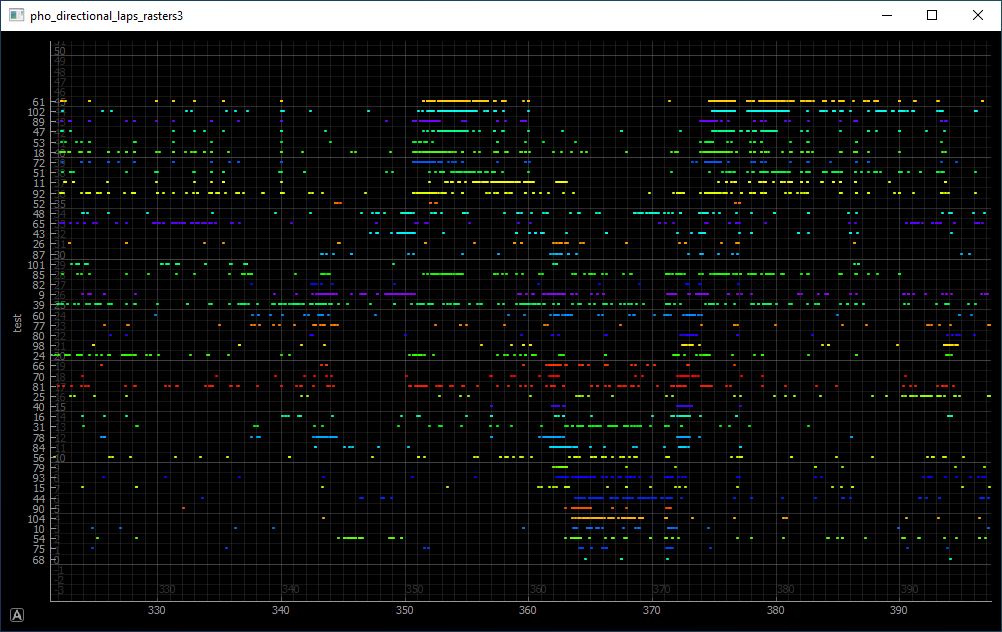

# 🌀🤷‍♀️🔀 Unsorted


## Robustly Accessing Computation Results (2024-08-30)
These snippets can be used in a notebook to safely load a computation output (if it is present) or force compute it if it is missing.

### Compute if missing (require result):
```python
from pyphoplacecellanalysis.Analysis.reliability import TrialByTrialActivity
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import TrialByTrialActivityResult

directional_trial_by_trial_activity_result: TrialByTrialActivityResult = curr_active_pipeline.global_computation_results.computed_data.get('TrialByTrialActivity', None)
if directional_trial_by_trial_activity_result is None:
    # if `KeyError: 'TrialByTrialActivity'` recompute
    print(f'TrialByTrialActivity is not computed, computing it...')
    curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['trial_by_trial_metrics'], enabled_filter_names=None, fail_on_exception=True, debug_print=False)
    directional_trial_by_trial_activity_result = curr_active_pipeline.global_computation_results.computed_data.get('TrialByTrialActivity', None) ## try again to get the result
    assert directional_trial_by_trial_activity_result is not None, f"directional_trial_by_trial_activity_result is None even after forcing recomputation!!"
    print(f'\t done.')

## unpack either way:
any_decoder_neuron_IDs = directional_trial_by_trial_activity_result.any_decoder_neuron_IDs
active_pf_dt: PfND_TimeDependent = directional_trial_by_trial_activity_result.active_pf_dt
directional_lap_epochs_dict: Dict[str, Epoch] = directional_trial_by_trial_activity_result.directional_lap_epochs_dict
directional_active_lap_pf_results_dicts: Dict[str, TrialByTrialActivity] = directional_trial_by_trial_activity_result.directional_active_lap_pf_results_dicts
## OUTPUTS: directional_trial_by_trial_activity_result, directional_active_lap_pf_results_dicts

```



### Act if computed (optional action):
```python
from pyphoplacecellanalysis.Analysis.reliability import TrialByTrialActivity
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import TrialByTrialActivityResult

directional_trial_by_trial_activity_result: TrialByTrialActivityResult = curr_active_pipeline.global_computation_results.computed_data.get('TrialByTrialActivity', None)

if directional_trial_by_trial_activity_result is not None:
    any_decoder_neuron_IDs = directional_trial_by_trial_activity_result.any_decoder_neuron_IDs
    active_pf_dt: PfND_TimeDependent = directional_trial_by_trial_activity_result.active_pf_dt
    directional_lap_epochs_dict: Dict[str, Epoch] = directional_trial_by_trial_activity_result.directional_lap_epochs_dict
    directional_active_lap_pf_results_dicts: Dict[str, TrialByTrialActivity] = directional_trial_by_trial_activity_result.directional_active_lap_pf_results_dicts
    ## OUTPUTS: directional_trial_by_trial_activity_result, directional_active_lap_pf_results_dicts
else:
    print(f'TrialByTrialActivity is not computed.')
```